# PRÁCTICA 1_EDA

Gozde Yazganoglu/ Irma Sanchez

### "This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. The data was collected to answer the following question: Can you predict who would be interested in buying a caravan insurance policy and give an explanation why?"

En primer lugar importamos las librerías necesarias para realizar el análsis exploratorio de los datos

In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import IPython
import warnings
warnings.filterwarnings("ignore")

Definimos nuestros dataframes, extrayendo los datos de los ficheros .txt

In [2]:
data_train = pd.read_table(".i//data/raw/ticdata2000.txt", sep="\t", header=None )
data_test = pd.read_table("..//data/raw/ticeval2000.txt", sep="\t", header=None )
df_l0  = pd.read_csv("..//data/raw/dfL0.txt",sep=";")
df_l1  = pd.read_csv("..//data/raw/dfL1.txt",sep=";")
df_l2  = pd.read_csv("..//data/raw/dfL2.txt",sep=";")
df_l3  = pd.read_csv("..//data/raw/dfL3.txt",sep=";")
df_l4  = pd.read_csv("..//data/raw/dfL4.txt",sep=";")

A través del diccionario de datos, cambiamos los nombres de las columnas, ya que de esta manera obtenemos un data ser mucho más limpio y claro. 

In [3]:
data_dict = pd.read_csv("..//data/raw/dictionary.xlsx")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xad in position 41: invalid start byte

In [34]:
data_dict

NameError: name 'data_dict' is not defined

In [8]:
data_train.columns= ['1_cust_subtype','2_num_houses','3_avg_hh_size','4_avg_age','5_cust_type',
        '6_rel_cat','7_rel_prot','8_rel_other','9_rel_none','10_mar_maried',
        '11_mar_liv_tog','12_mar_other','13_mar_single','14_hh_woclild','15_hh_child',
        '16_educ_high','17_educ_med','18_educ_low','19_ocup_high','20_ocup_entp',
        '21_ocup_farmer','22_ocup_mid_man','23_ocup_skilled','24_ocup_unskilled','25_sc_a',
        '26_sc_b1','27_sc_b2','28_sc_c','29_sc_d','30_home_rent',
        '31_home_ovner','32_car_1','33_car_2','34_car_0','35_health_pub', 
        '36_health_priv','37_income_30','38_income_45','39_income_75','40_income_122',
        '41_income_more','42_income_avg','43_purc_class','44_ins_amnt_3rd','45_ins_firms',
        '46_ins_agr','47_ins_car','48_ins_van','49_ins_moto','50_ins_lorry',
        '51_ins_trailer','52_ins_tractors','53_ins_agr_mach','54_ins_moped','55_ins_life',
        '56_ins_acc_pri','57_ins_acc_fam','58_ins_disab','59_ins_fire','60_ins_surf',
        '61_ins_boat','62_ins_bike','63_ins_property','64_ins_socsec','65_num_ins_3rd',
        '66_num_ins_firms','67_num_ins_agr','68_num_ins_car','69_num_ins_van','70_num_ins_moto',
        '71_num_ins_lorry','72_num_ins_trailer','73_num_ins_tractor','74_num_ins_agrmac','75_num_ins_moped',
        '76_num_ins_life','77_num_ins_acc_pri','78_num_ins_acc_fam','79_num_ins_disab','80_num_ins_fire',
        '81_num_ins_surf','82_num_ins_boat','83_num_ins_bike','84_num_ins_property','85_num_ins_socsec',
        '86_num_ins_caravan']

data_test_columns= ['1_cust_subtype','2_num_houses','3_avg_hh_size','4_avg_age','5_cust_type',
        '6_rel_cat','7_rel_prot','8_rel_other','9_rel_none','10_mar_maried',
        '11_mar_liv_tog','12_mar_other','13_mar_single','14_hh_woclild','15_hh_child',
        '16_educ_high','17_educ_med','18_educ_low','19_ocup_high','20_ocup_entp',
        '21_ocup_farmer','22_ocup_mid_man','23_ocup_skilled','24_ocup_unskilled','25_sc_a',
        '26_sc_b1','27_sc_b2','28_sc_c','29_sc_d','30_home_rent',
        '31_home_ovner','32_car_1','33_car_2','34_car_0','35_health_pub', 
        '36_health_priv','37_income_30','38_income_45','39_income_75','40_income_122',
        '41_income_more','42_income_avg','43_purc_class','44_ins_amnt_3rd','45_ins_firms',
        '46_ins_agr','47_ins_car','48_ins_van','49_ins_moto','50_ins_lorry',
        '51_ins_trailer','52_ins_tractors','53_ins_agr_mach','54_ins_moped','55_ins_life',
        '56_ins_acc_pri','57_ins_acc_fam','58_ins_disab','59_ins_fire','60_ins_surf',
        '61_ins_boat','62_ins_bike','63_ins_property','64_ins_socsec','65_num_ins_3rd',
        '66_num_ins_firms','67_num_ins_agr','68_num_ins_car','69_num_ins_van','70_num_ins_moto',
        '71_num_ins_lorry','72_num_ins_trailer','73_num_ins_tractor','74_num_ins_agrmac','75_num_ins_moped',
        '76_num_ins_life','77_num_ins_acc_pri','78_num_ins_acc_fam','79_num_ins_disab','80_num_ins_fire',
        '81_num_ins_surf','82_num_ins_boat','83_num_ins_bike','84_num_ins_property','85_num_ins_socsec']

In [9]:
data_train

1_cust_subtype  2_num_houses  3_avg_hh_size  4_avg_age  5_cust_type  \
0                 33             1              3          2            8   
1                 37             1              2          2            8   
2                 37             1              2          2            8   
3                  9             1              3          3            3   
4                 40             1              4          2           10   
...              ...           ...            ...        ...          ...   
5817              36             1              1          2            8   
5818              35             1              4          4            8   
5819              33             1              3          4            8   
5820              34             1              3          2            8   
5821              33             1              3          3            8   

      6_rel_cat  7_rel_prot  8_rel_other  9_rel_none  10_mar_maried  ...  \
0             0           5            1           3              7  ...   
1             1           4            1           4              6  ...   
2             0           4            2           4              3  ...   
3             2           3            2           4              5  ...   
4             1           4            1           4              7  ...   
...         ...         ...          ...         ...            ...  ...   
5817          0           6            1           2              1  ...   
5818          1           4            1           4              6  ...   
5819          0           6            0           3              5  ...   
5820          0           7            0           2              7  ...   
5821          0           6            1           2              7  ...   

      77_num_ins_acc_pri  78_num_ins_acc_fam  79_num_ins_disab  \
0                      0                   0                 0   
1                      0                   0                 0   
2                      0                   0                 0   
3                      0                   0                 0   
4                      0                   0                 0   
...                  ...                 ...               ...   
5817                   0                   0                 0   
5818                   0                   0                 0   
5819                   0                   0                 0   
5820                   0                   0                 0   
5821                   0                   0                 0   

      80_num_ins_fire  81_num_ins_surf  82_num_ins_boat  83_num_ins_bike  \
0                   1                0                0                0   
1                   1                0                0                0   
2                   1                0                0                0   
3                   1                0                0                0   
4                   1                0                0                0   
...               ...              ...              ...              ...   
5817                1                0                0                0   
5818                1                0                0                0   
5819                1                0                0                0   
5820                0                0                0                0   
5821                0                0                0                0   

      84_num_ins_property  85_num_ins_socsec  86_num_ins_caravan  
0                       0                  0                   0  
1                       0                  0                   0  
2                       0                  0                   0  
3                       0                  0                   0  
4                       0                  0                   0  
...                   ...                ...                

A continuación, comprobamos la clase de nuestros datos, y observamos que todos se tratan como tipo 'integer' en ambos data set (training y test)

In [10]:
data_train.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

feature_type  count
0        int64     86

In [11]:
data_test.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

feature_type  count
0        int64     85

Ahora, analizaremos si existen valores nulos o duplicados en nuestros datos. 

In [12]:
data_train_dtypes = pd.merge(data_train.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         data_train.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

data_test_dtypes = pd.merge(data_test.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         data_test.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')


In [13]:
data_train_dtypes.sort_values(['missing_value', 'feature_type'])

index  missing_value feature_type
0       1_cust_subtype              0        int64
1          62_ins_bike              0        int64
2          61_ins_boat              0        int64
3          60_ins_surf              0        int64
4          59_ins_fire              0        int64
..                 ...            ...          ...
81            26_sc_b1              0        int64
82             25_sc_a              0        int64
83   24_ocup_unskilled              0        int64
84            32_car_1              0        int64
85  86_num_ins_caravan              0        int64

[86 rows x 3 columns]

In [14]:
data_test_dtypes.sort_values(['missing_value', 'feature_type'])

index  missing_value feature_type
0       0              0        int64
1      60              0        int64
2      59              0        int64
3      58              0        int64
4      57              0        int64
..    ...            ...          ...
80     24              0        int64
81     23              0        int64
82     22              0        int64
83     30              0        int64
84     84              0        int64

[85 rows x 3 columns]

In [15]:
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break
    return dups

In [16]:
duplicate_cols = duplicate_columns(data_train)

In [17]:
duplicate_cols

[]

In [18]:
duplicate_cols = duplicate_columns(data_test)

In [19]:
duplicate_cols

[]

Observamos que no existen ni valores nulos ni duplicados en los dos conjuntos de datos (train y test), por tanto no hay que tratar variables nulos.

# Análisis de las variables

Utilizando sweetviz, obtenemos un primer análisis.

In [24]:
analyze_report=sv.analyze(data_train)
analyze_report.show_html('primer_analisis.html')

                                             |                                                                …

Report primer_analisis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



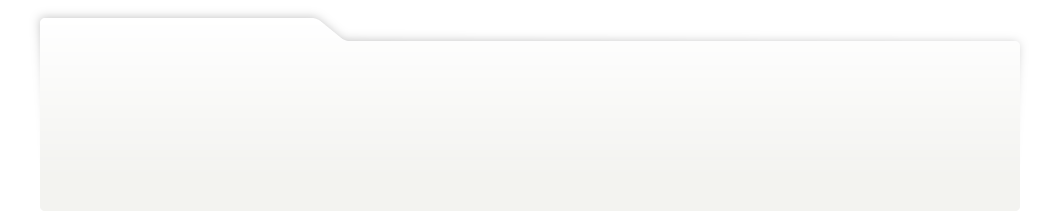
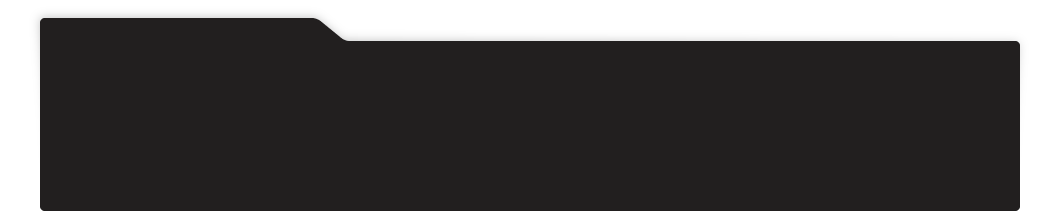
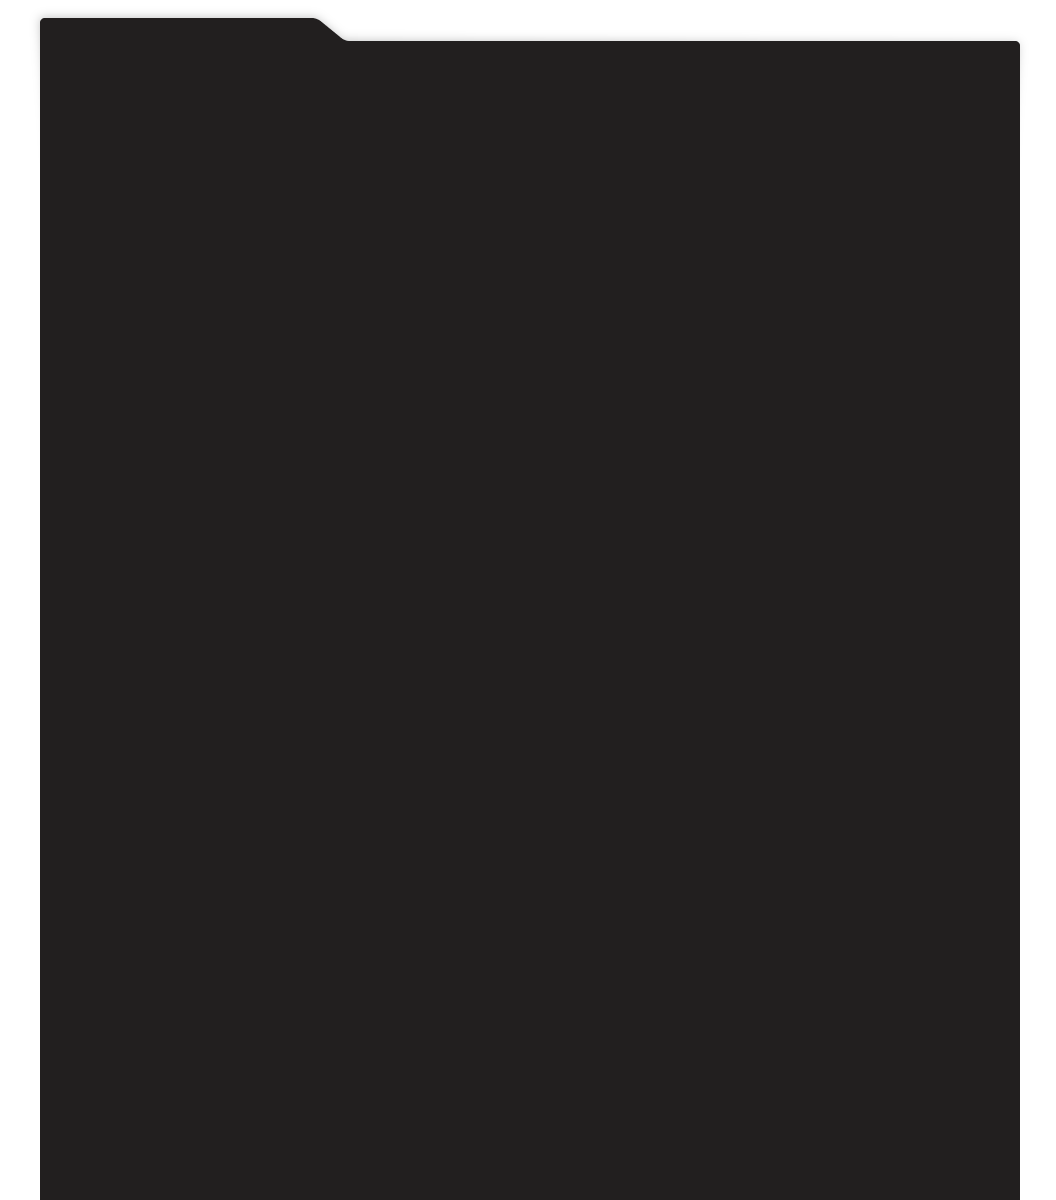
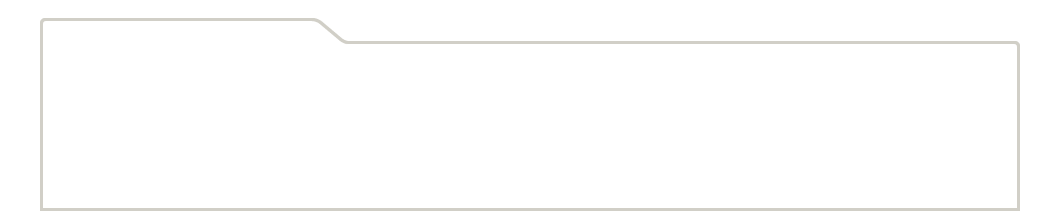
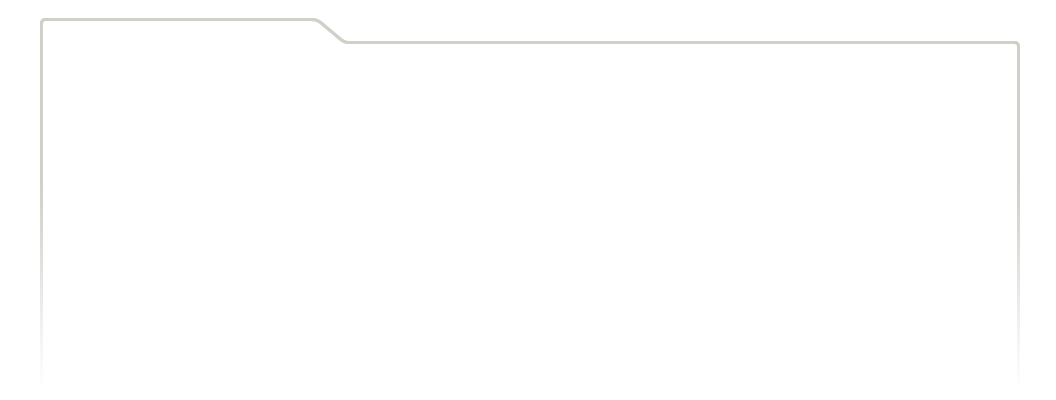
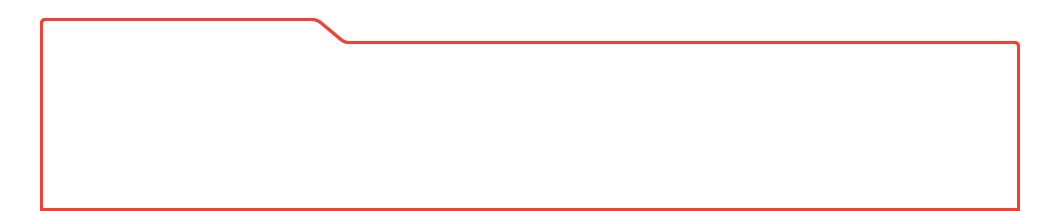
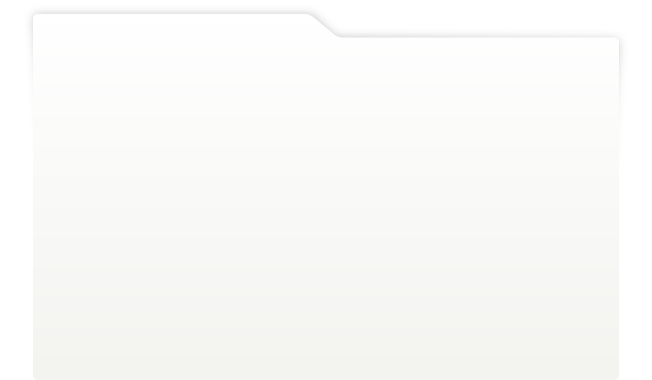
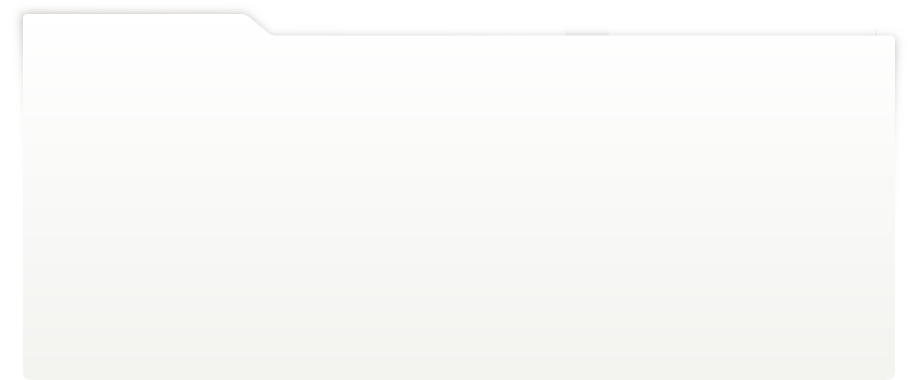
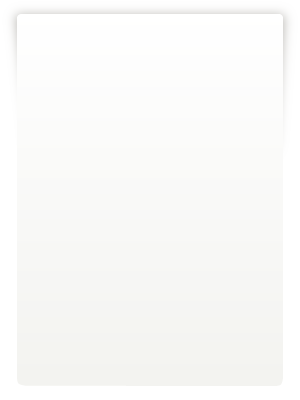
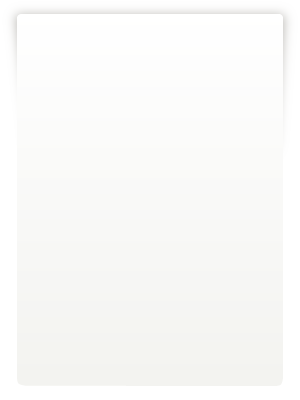
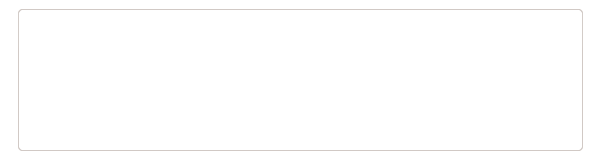
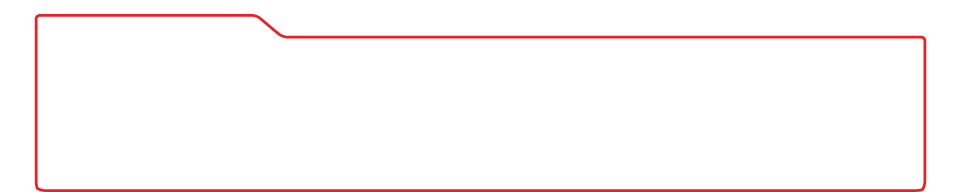
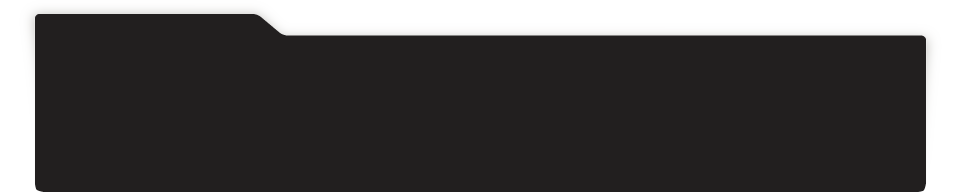
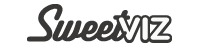
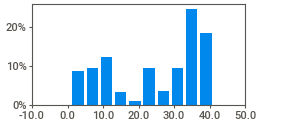
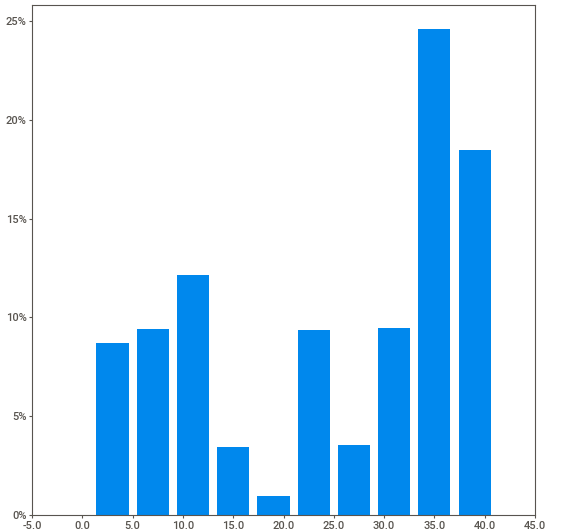
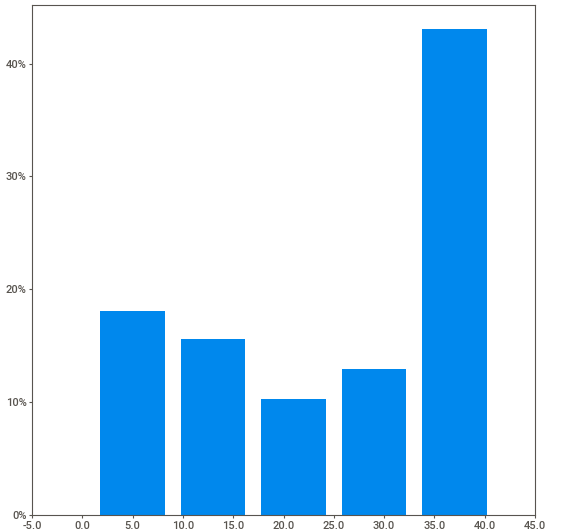
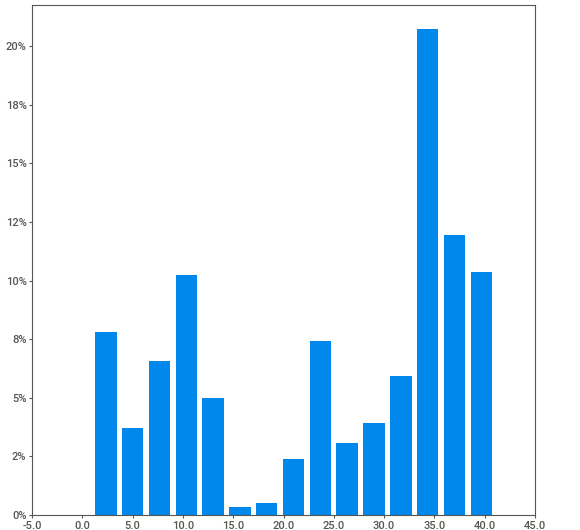
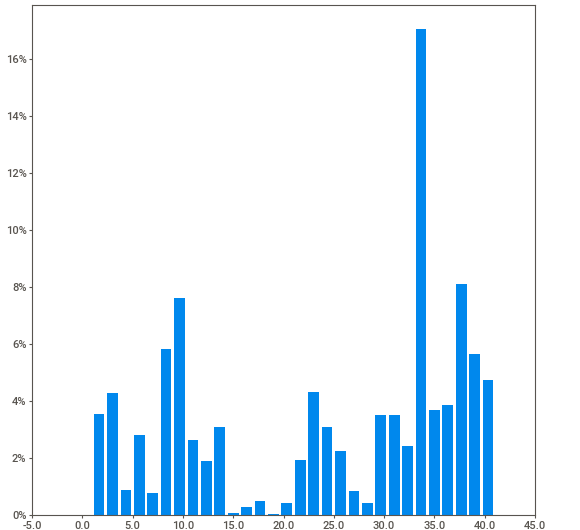
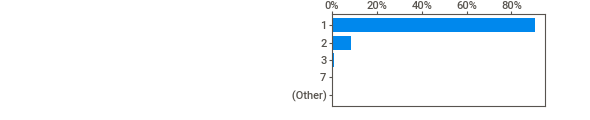
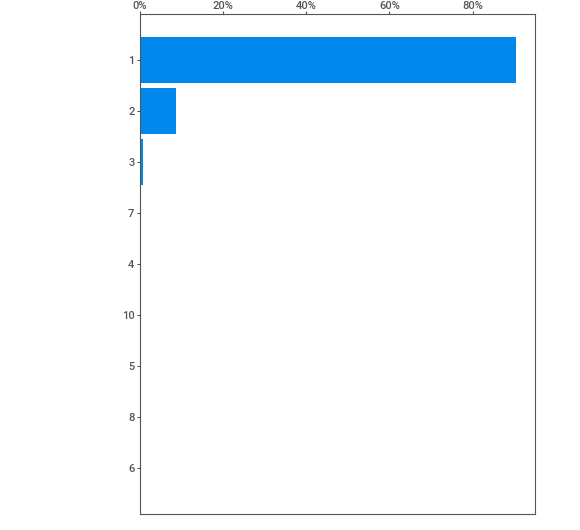
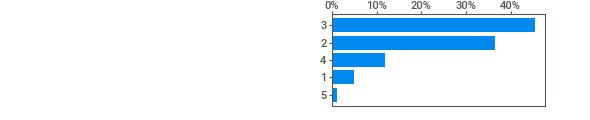
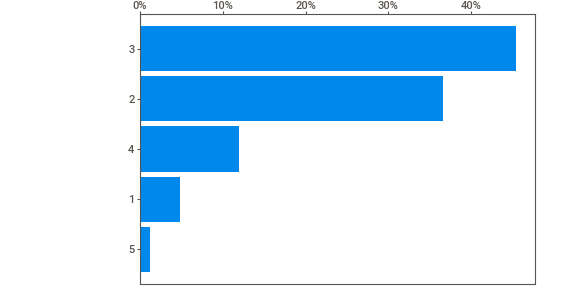
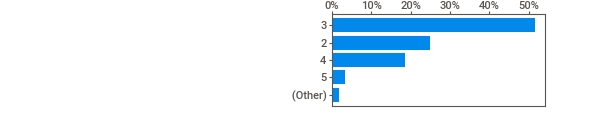
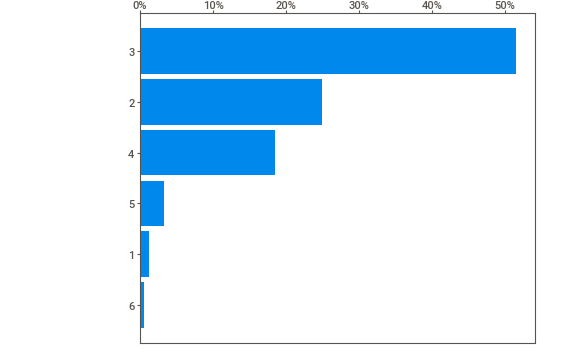
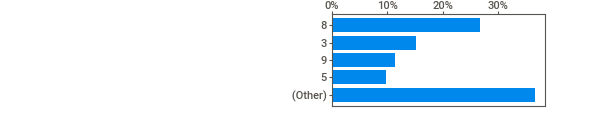
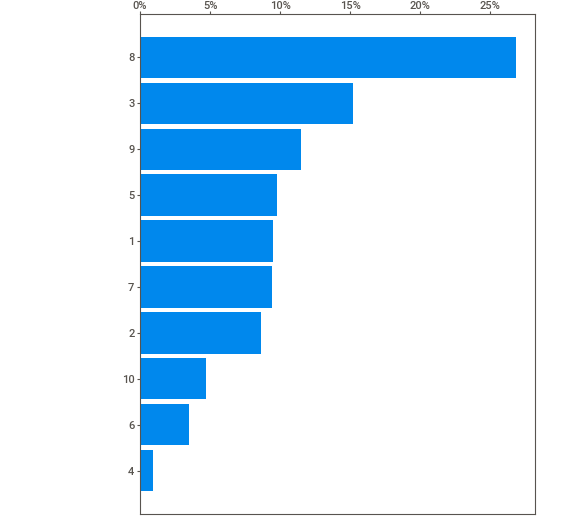
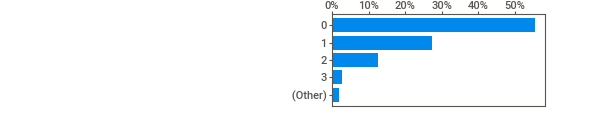
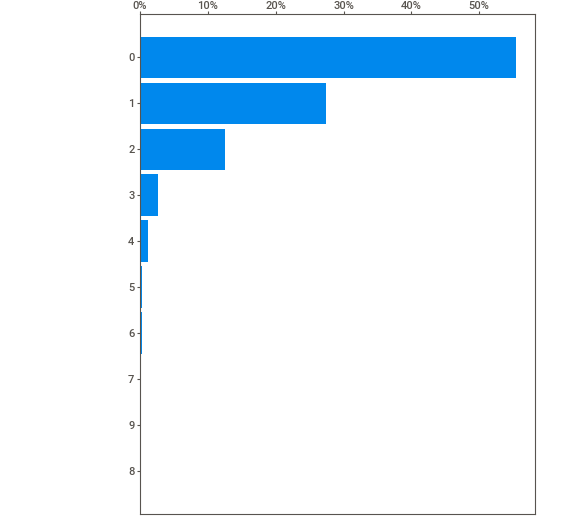
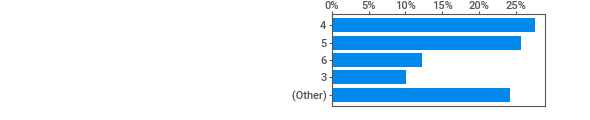
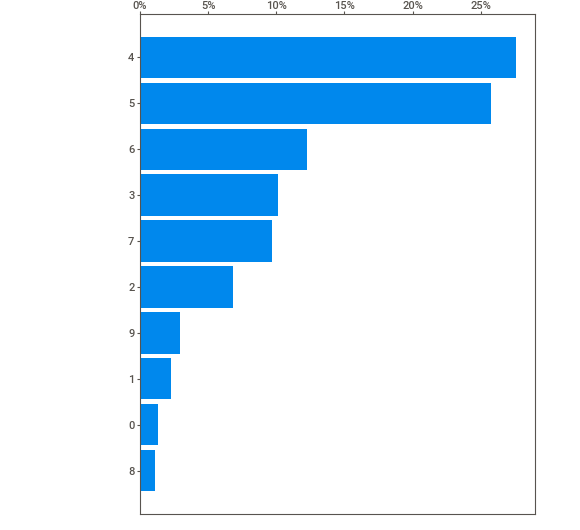
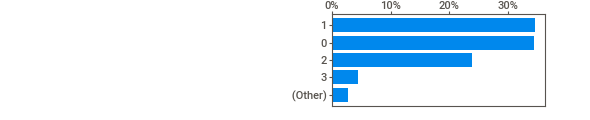
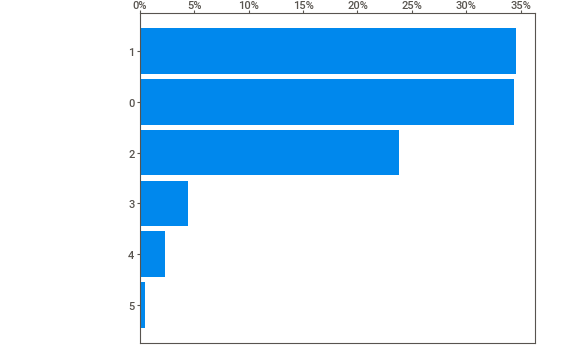
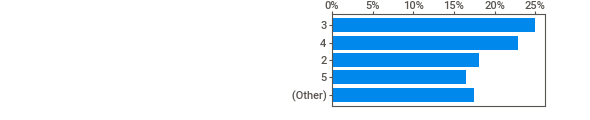
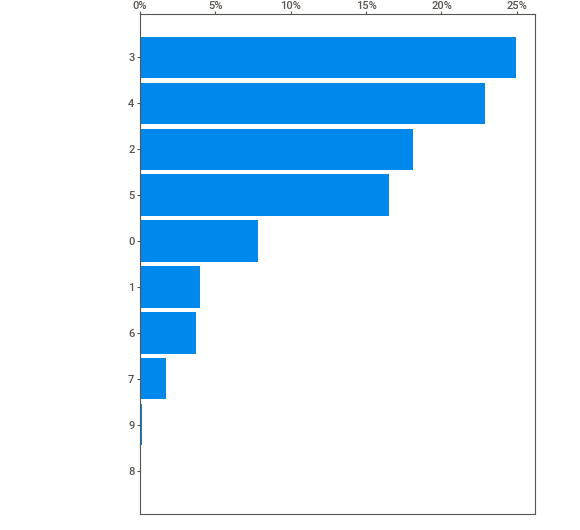
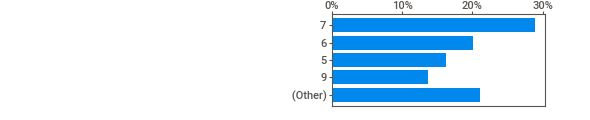
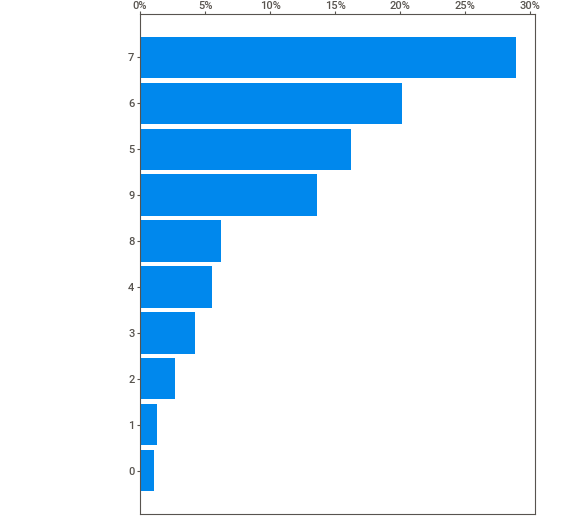
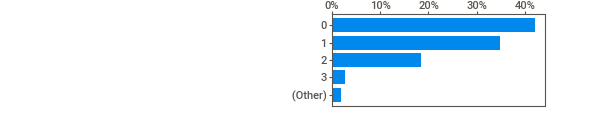
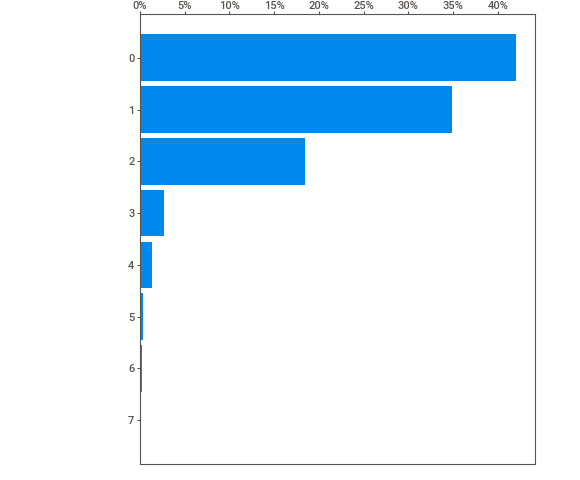
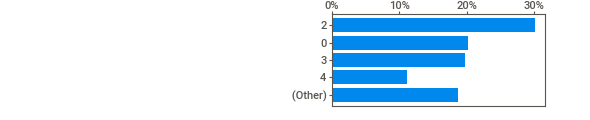
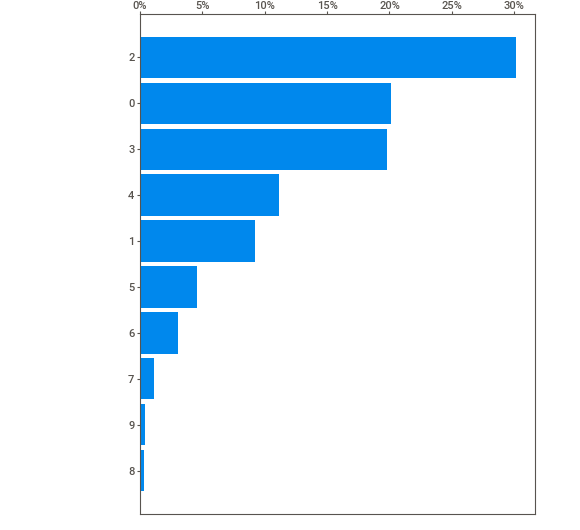
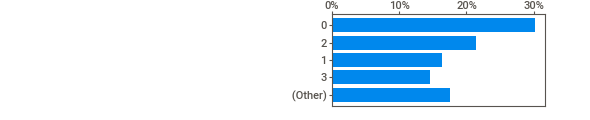
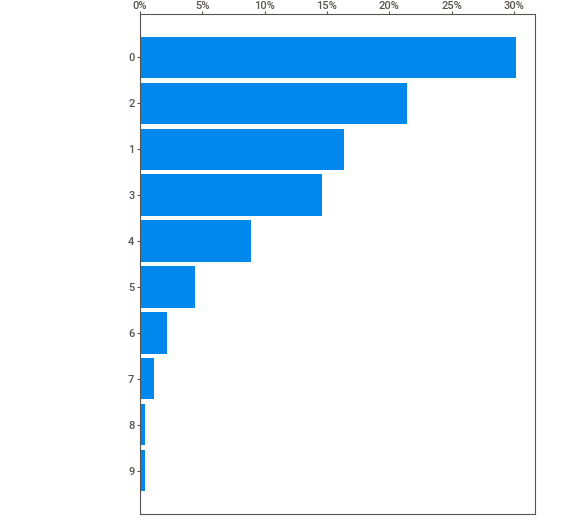
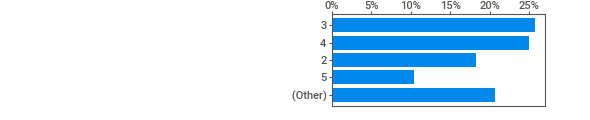
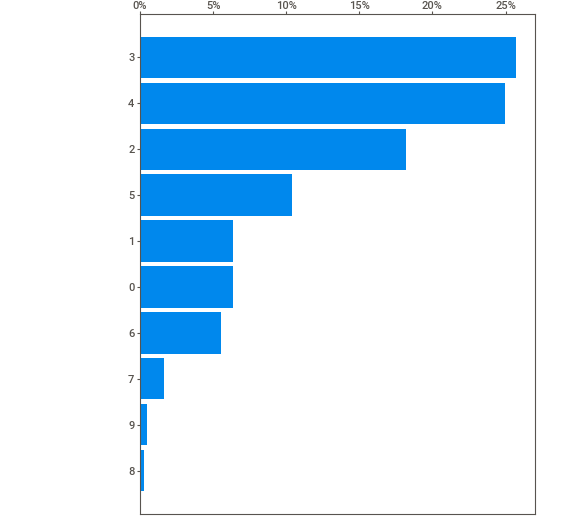
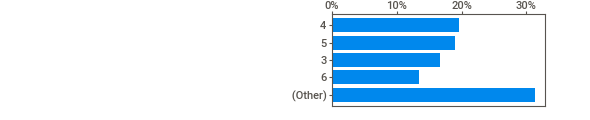
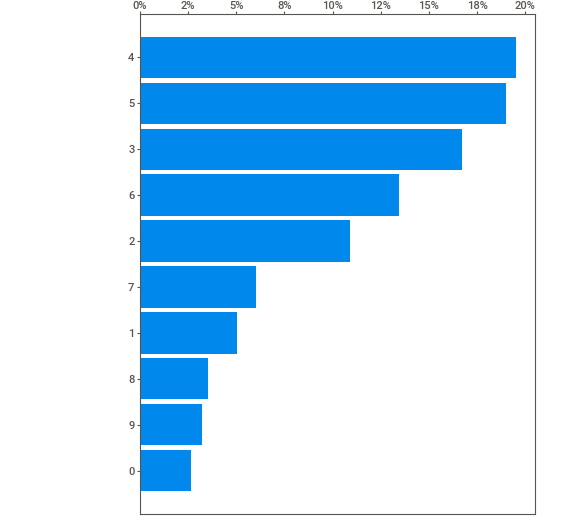
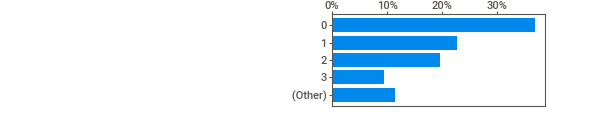
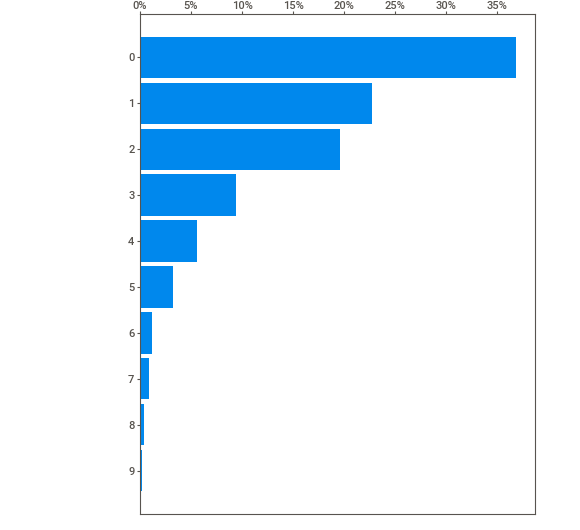
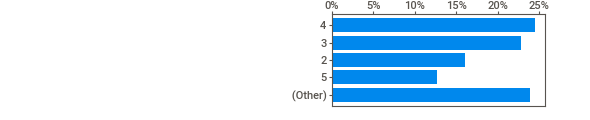
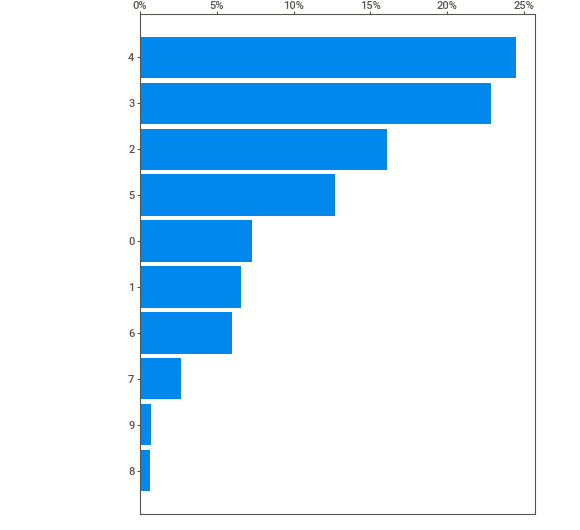
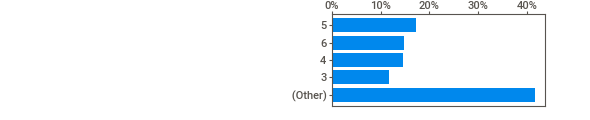
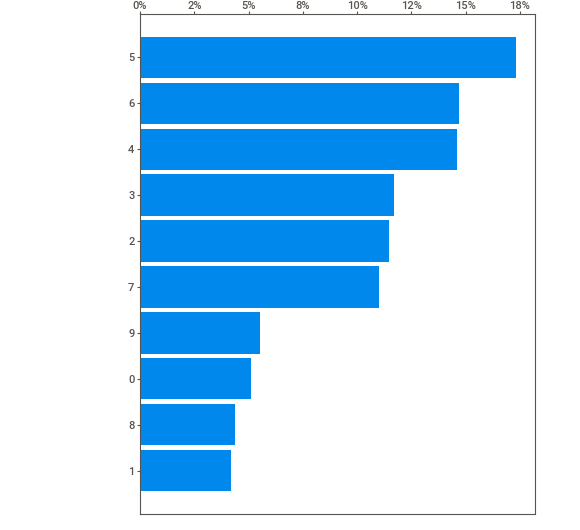
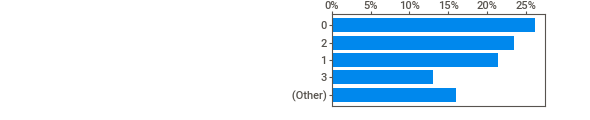
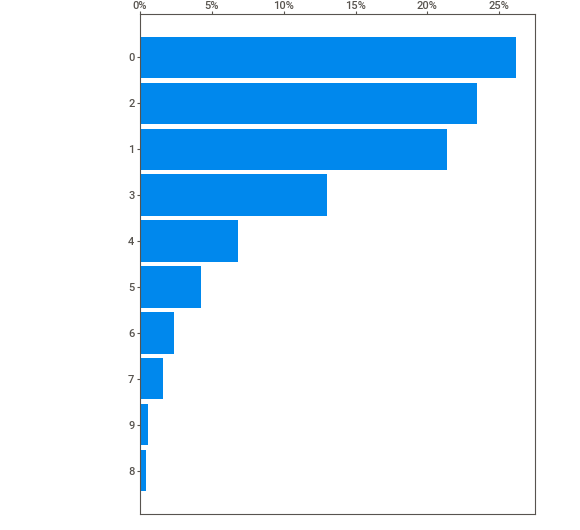
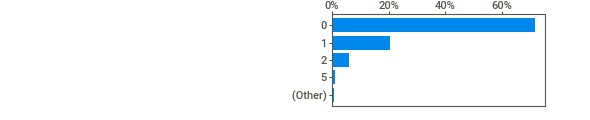
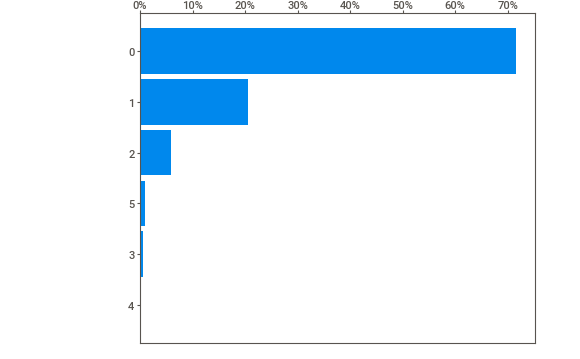
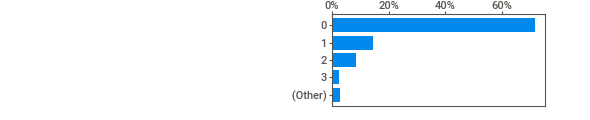
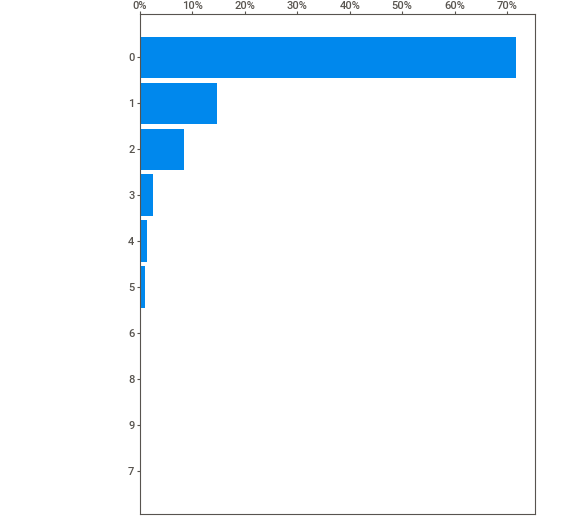
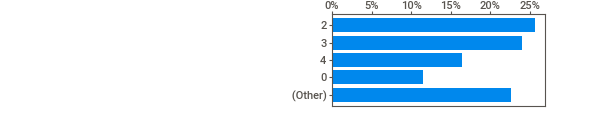
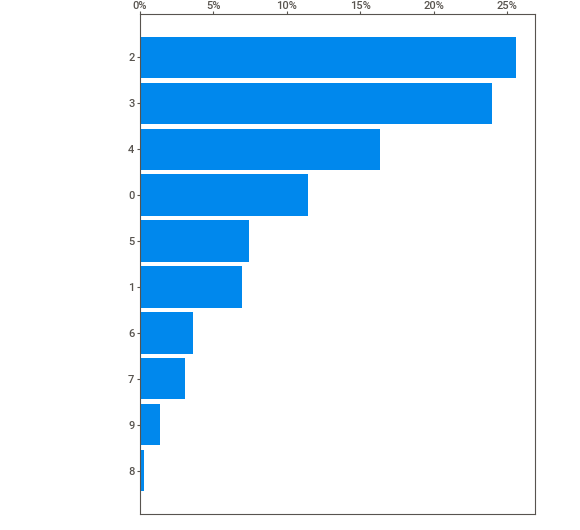
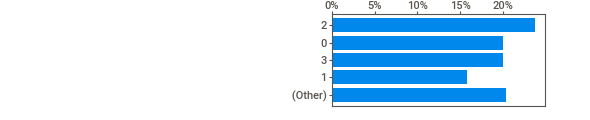
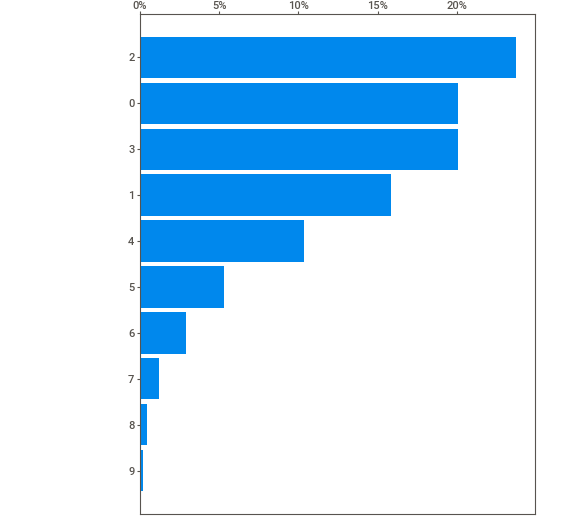
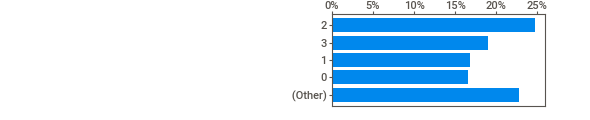
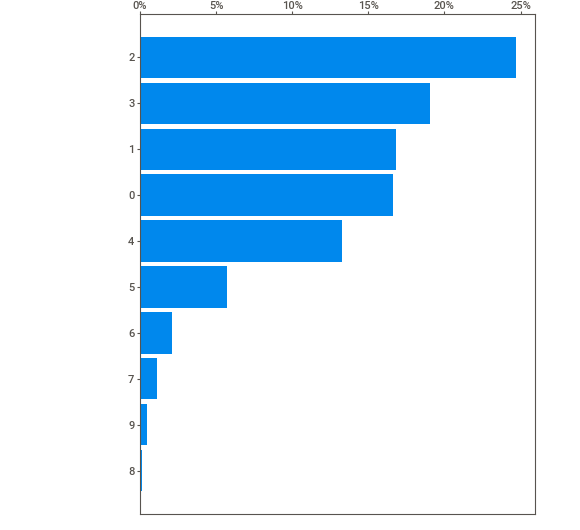
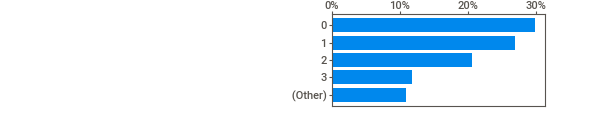
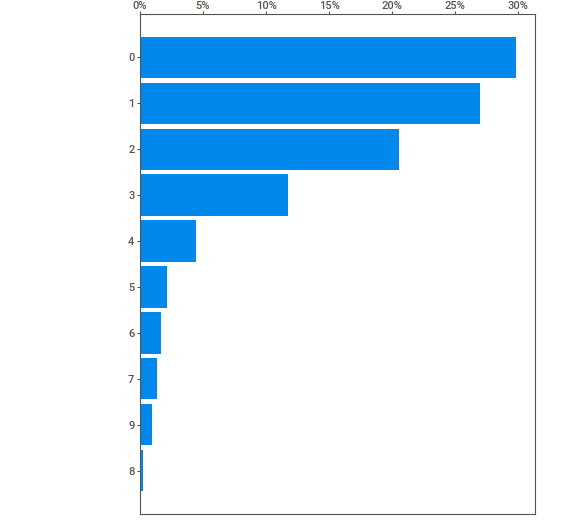
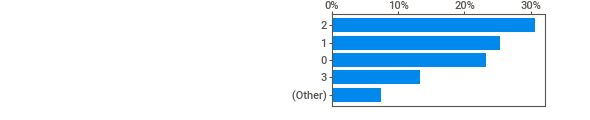
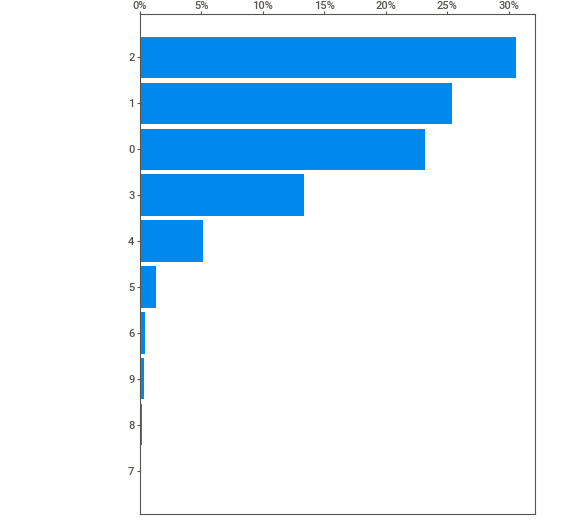
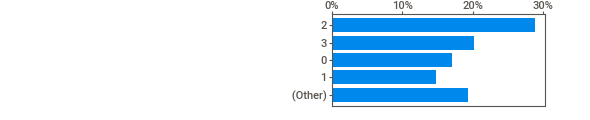
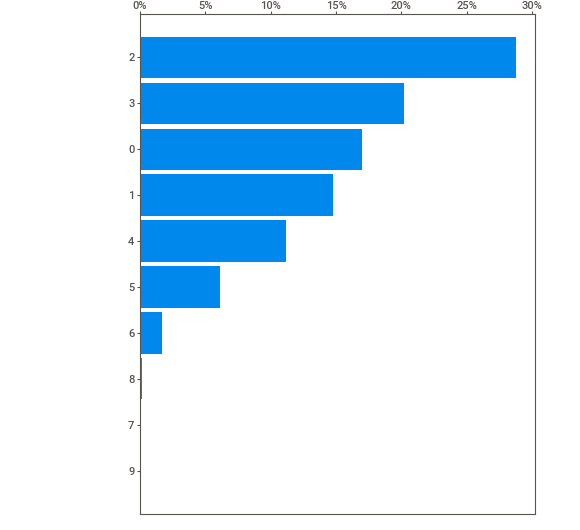
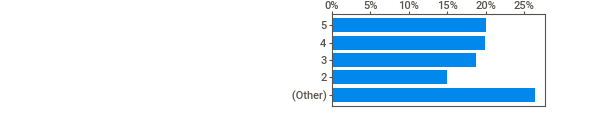
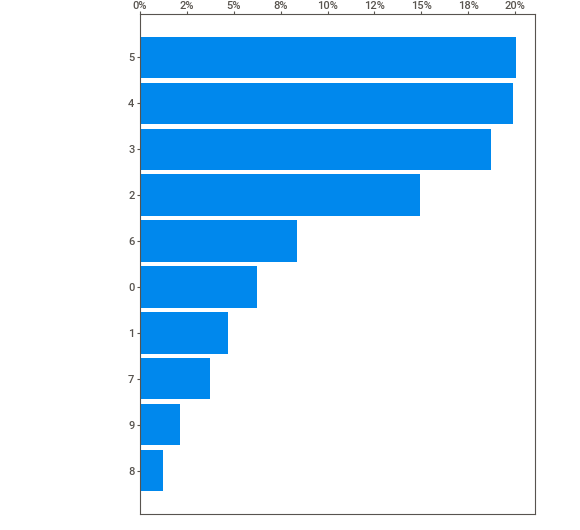
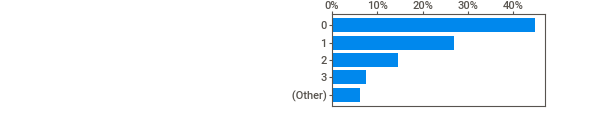
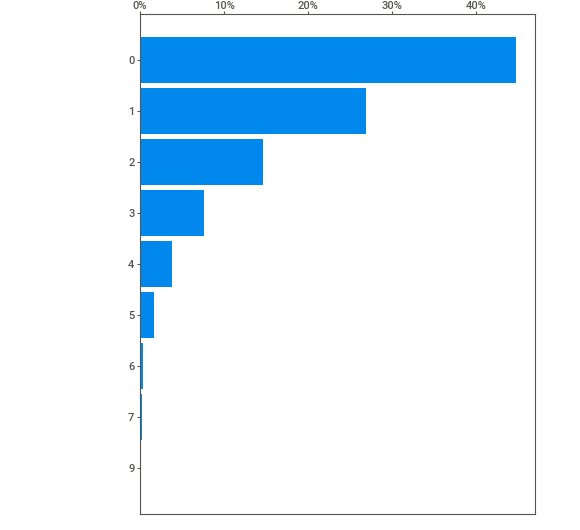
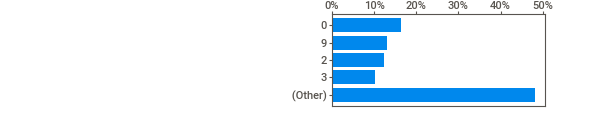
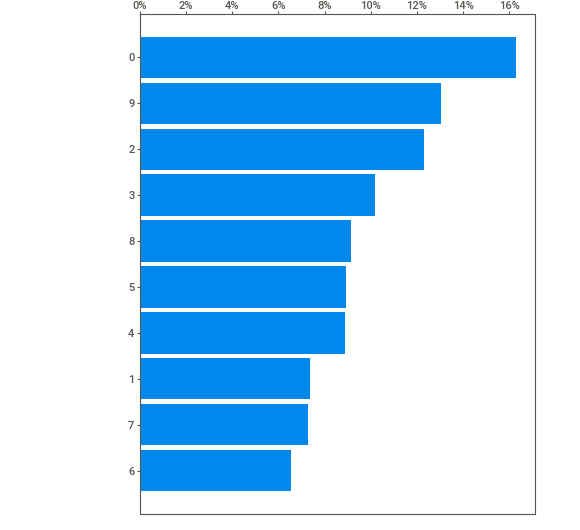
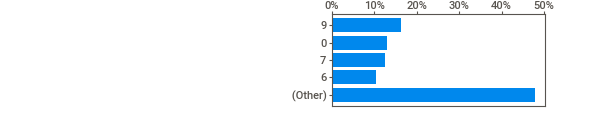
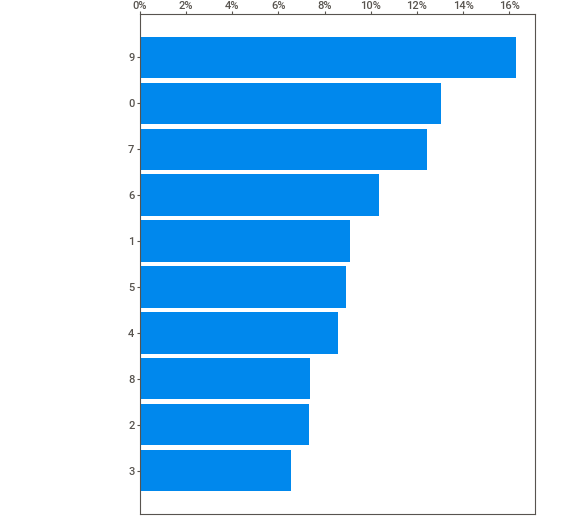
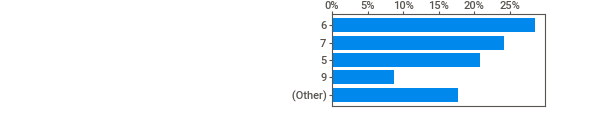
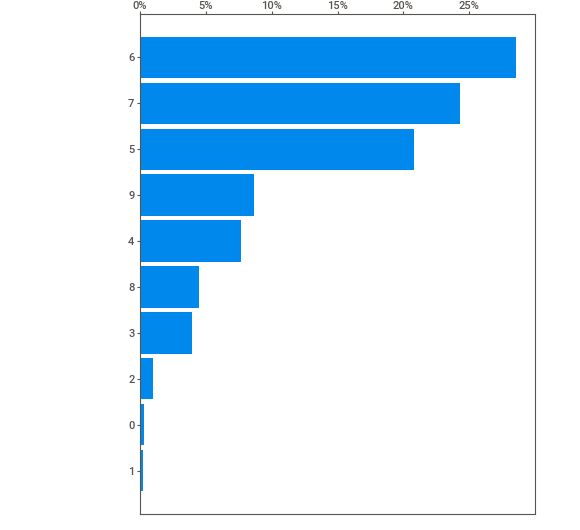
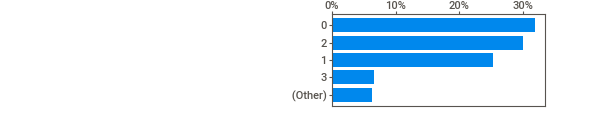
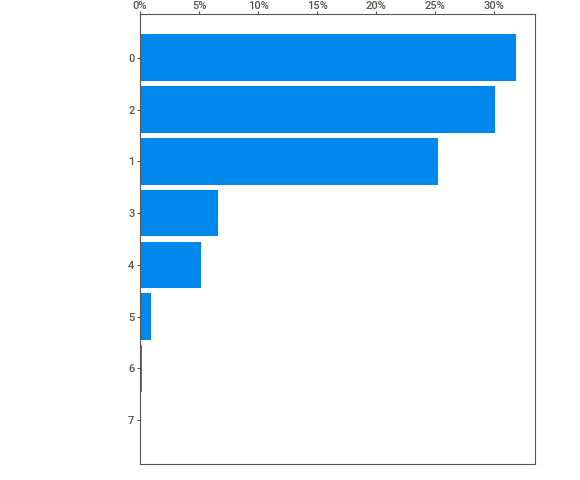
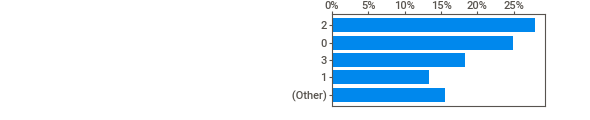
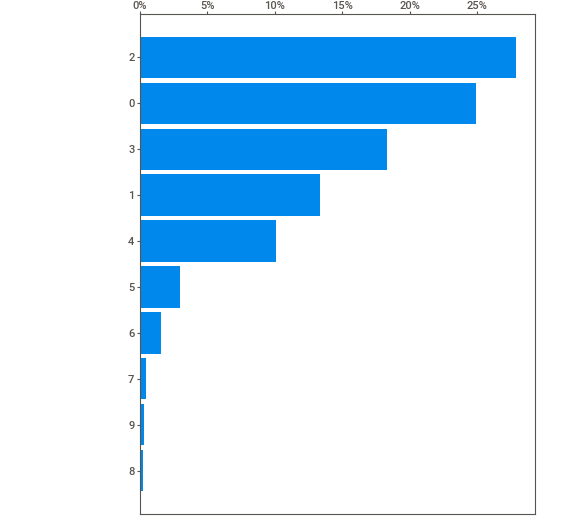
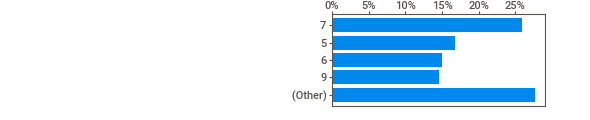
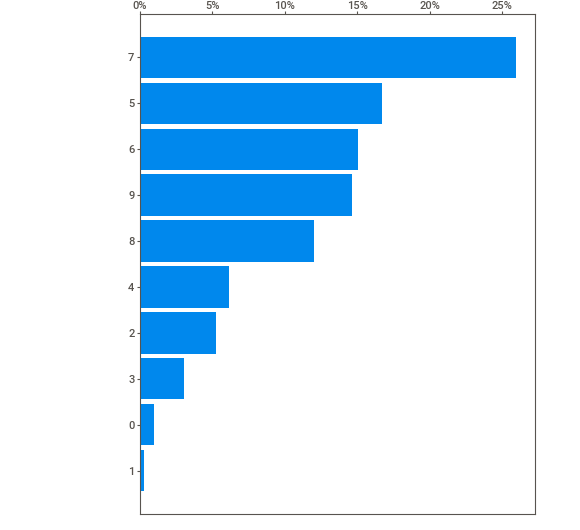
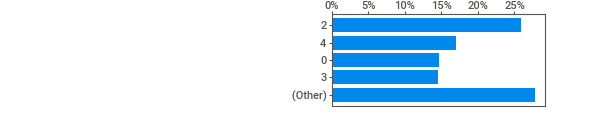
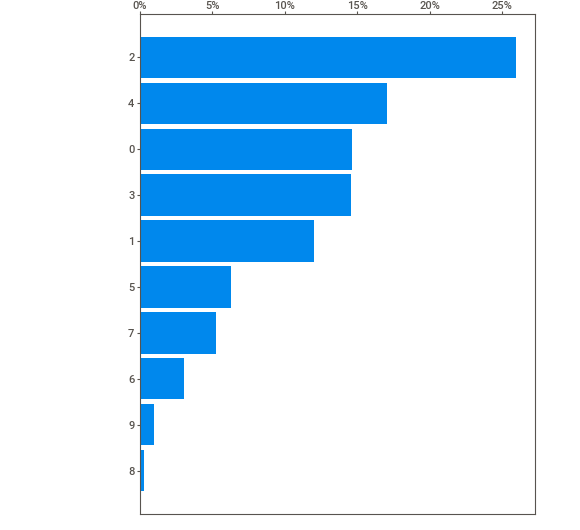
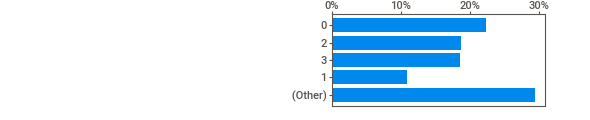
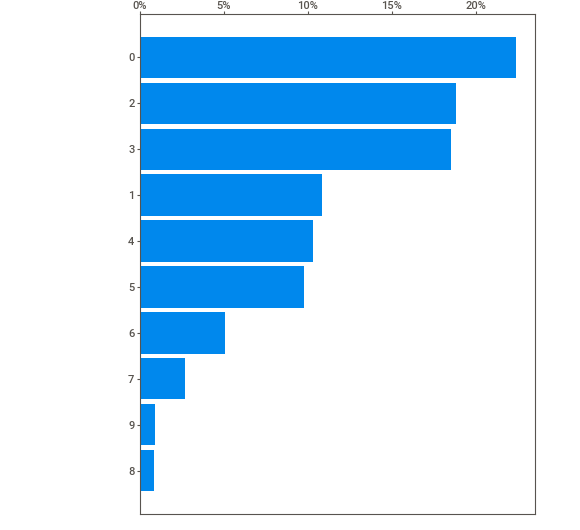
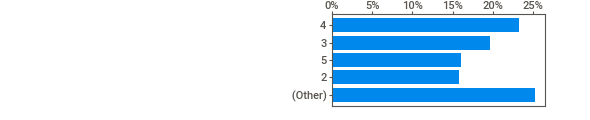
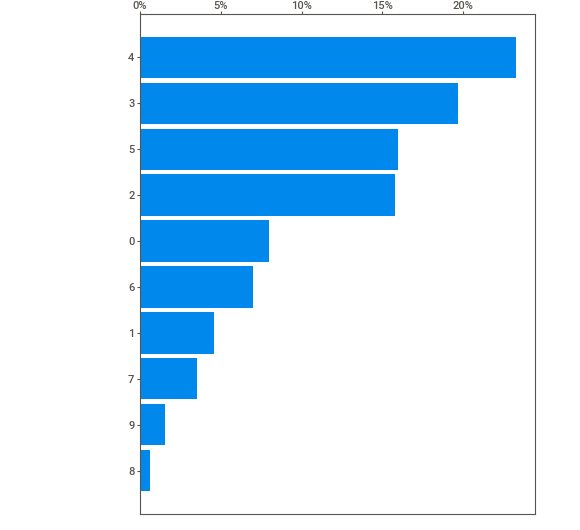
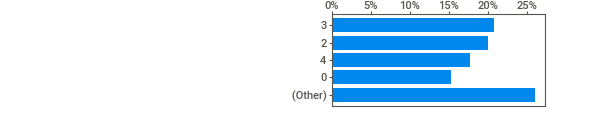
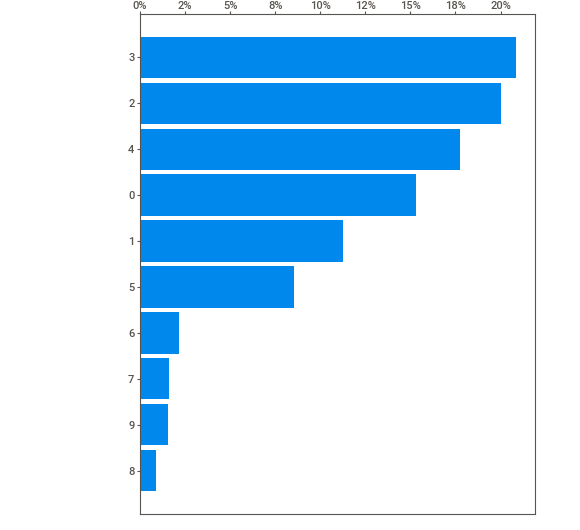
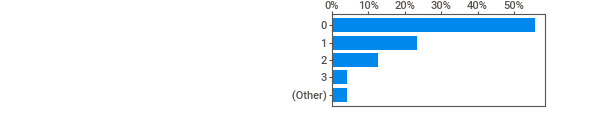
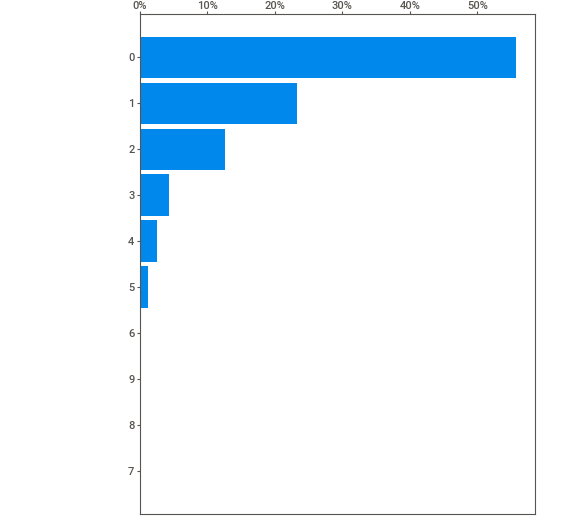
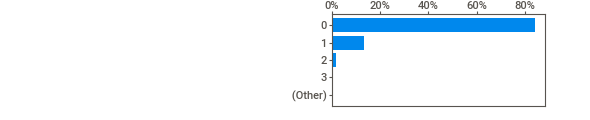
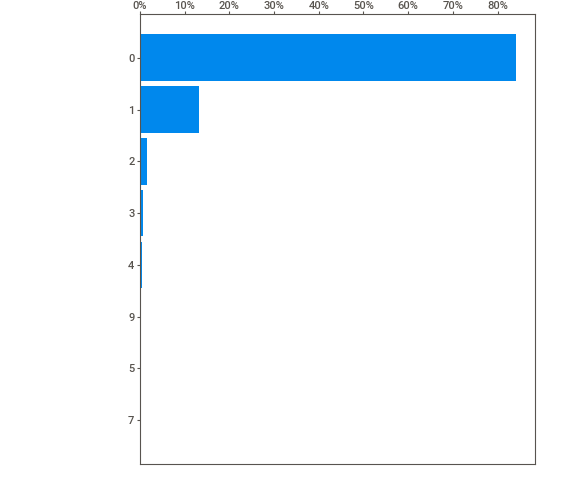
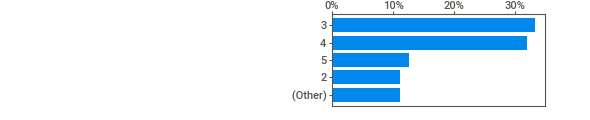
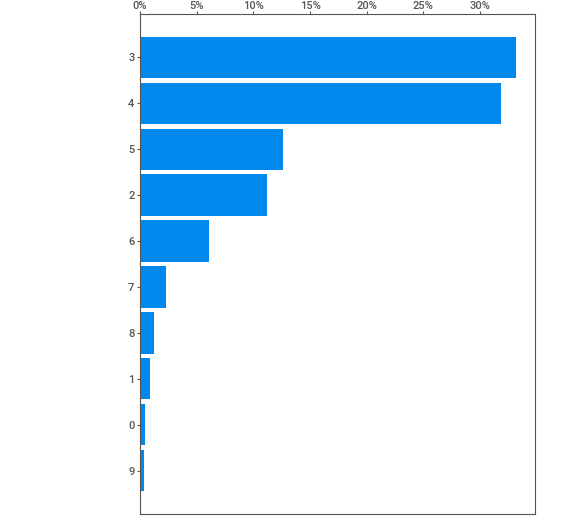
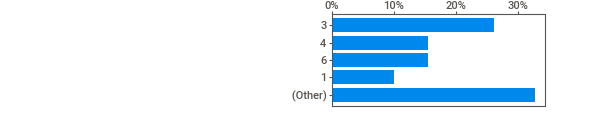
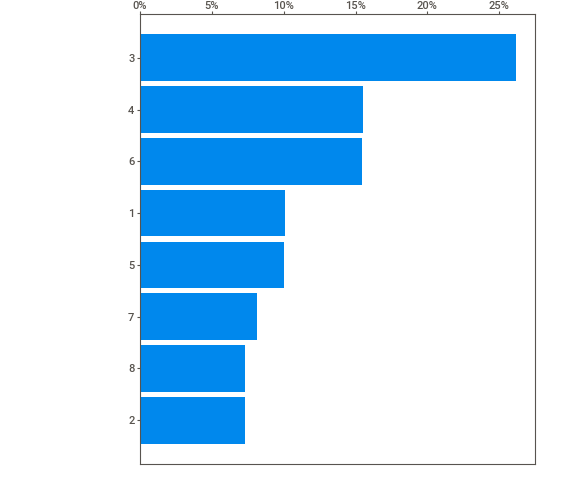
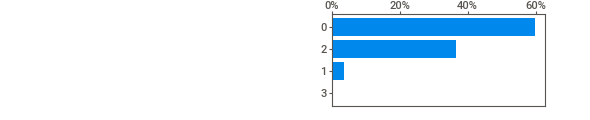
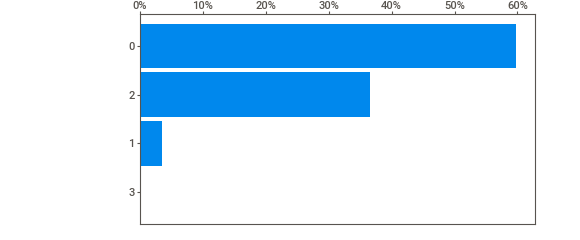
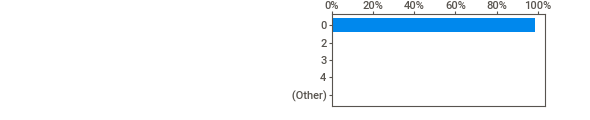
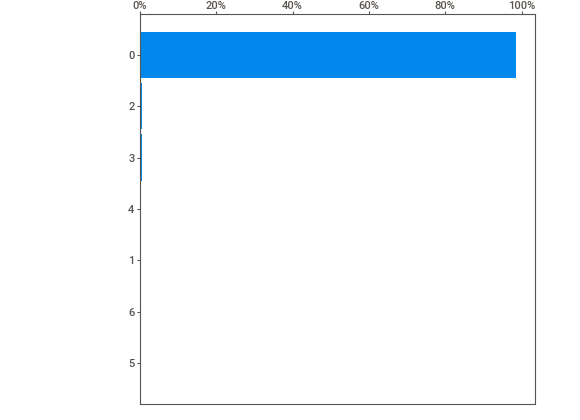
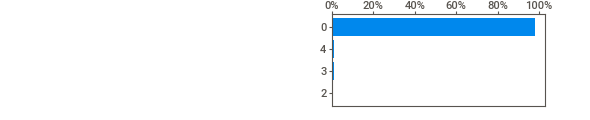
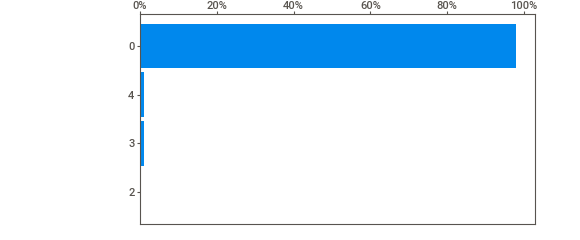
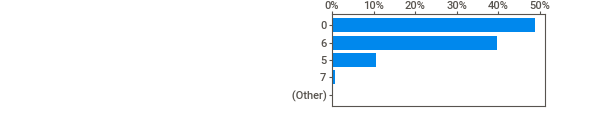
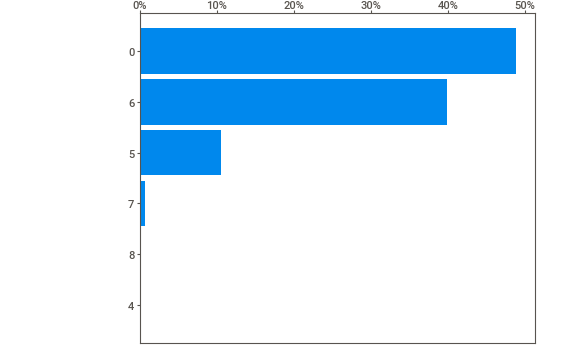
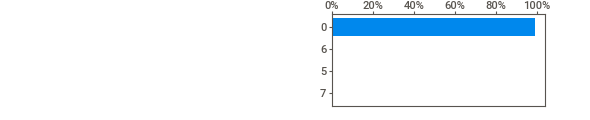
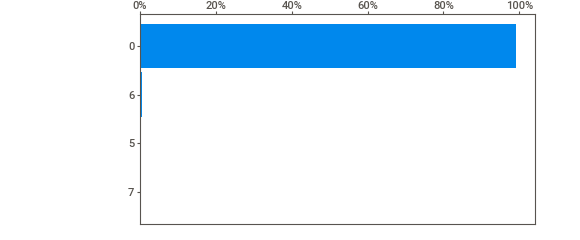
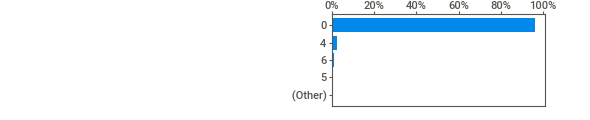
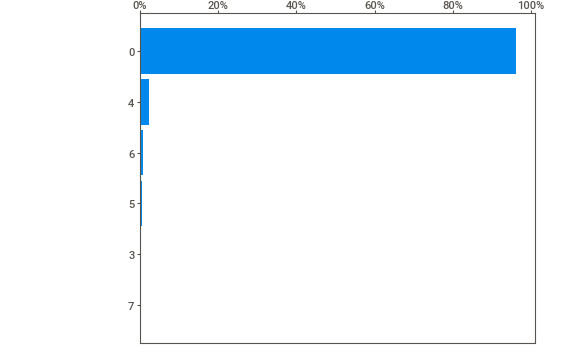
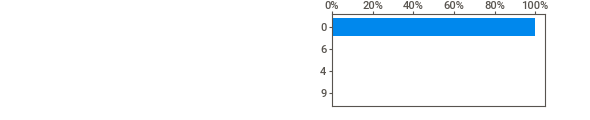
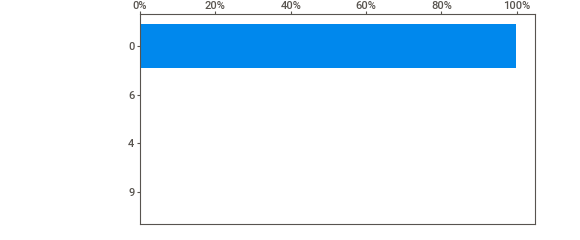
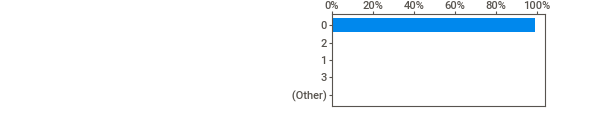
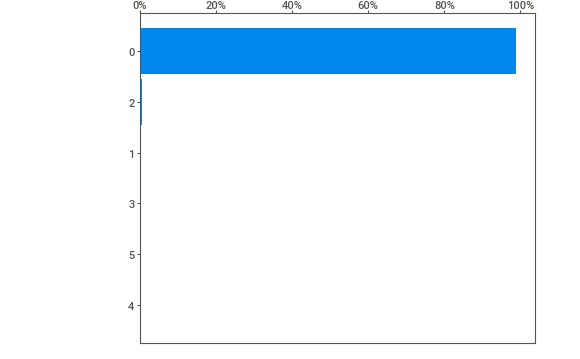
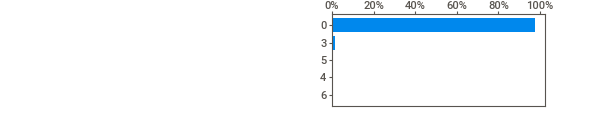
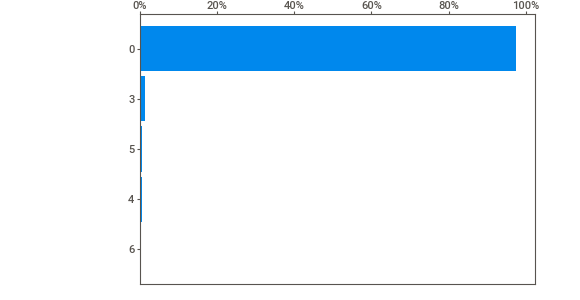
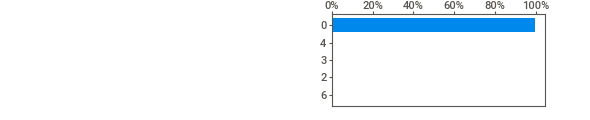
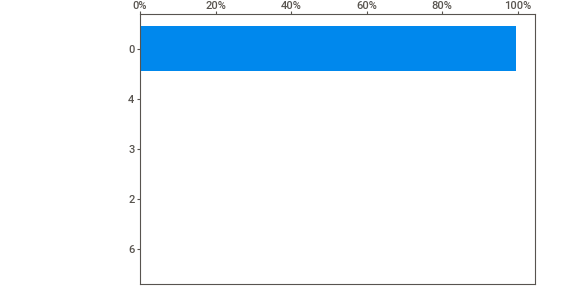
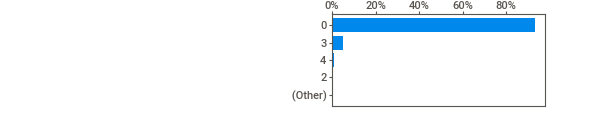
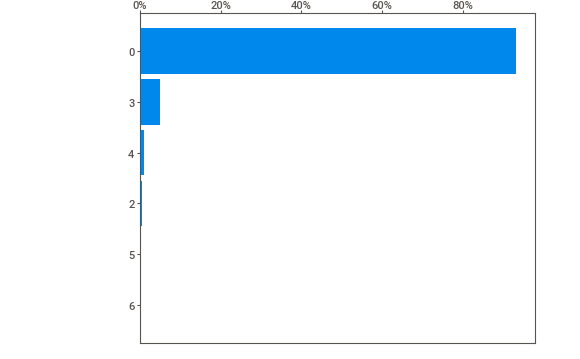
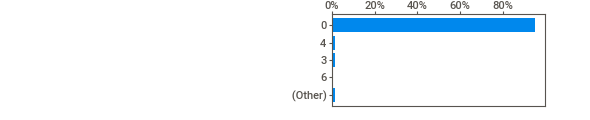
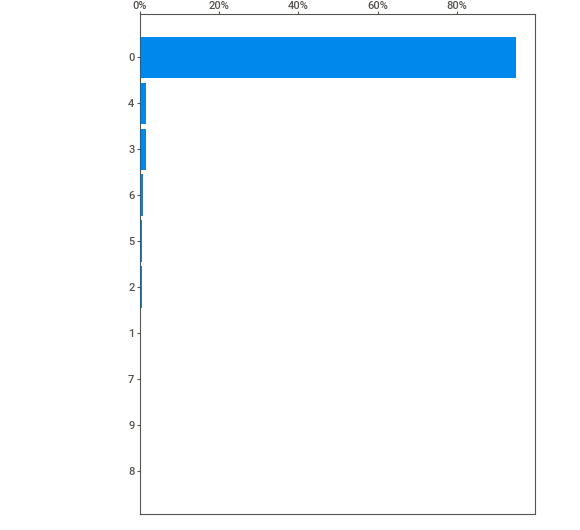
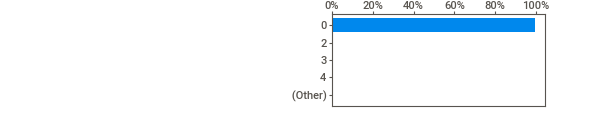
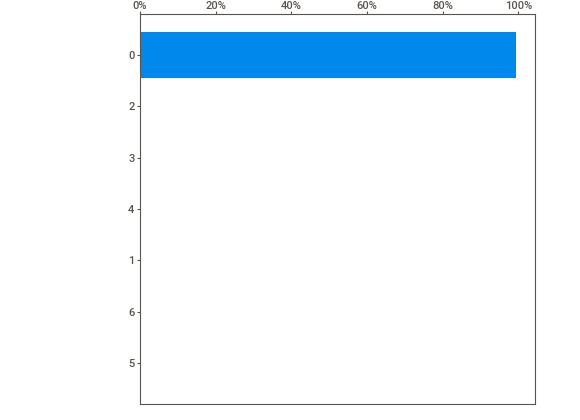
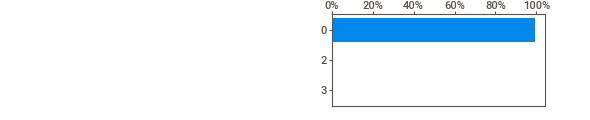
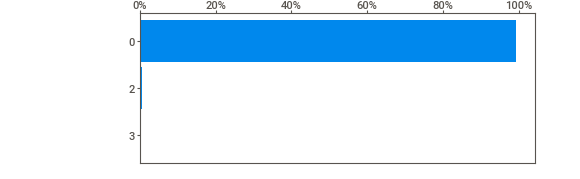
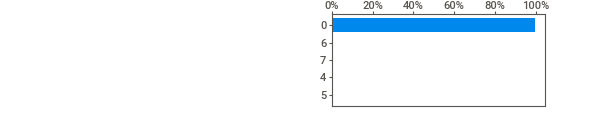
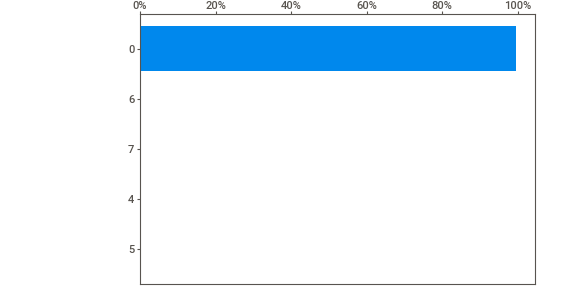
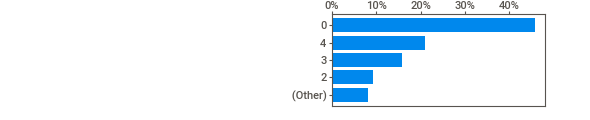
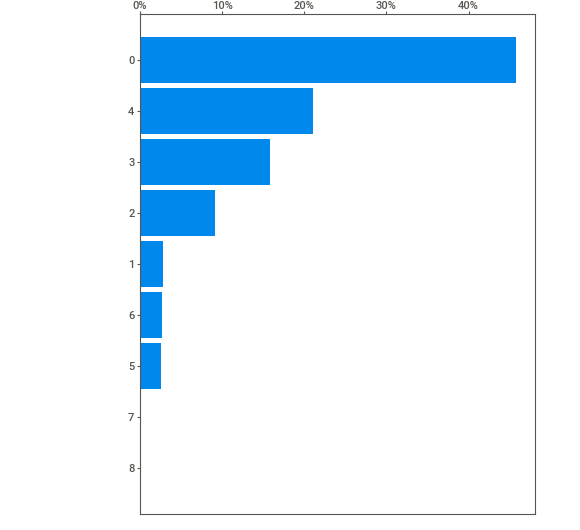
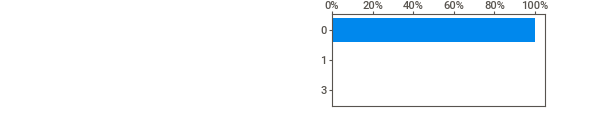
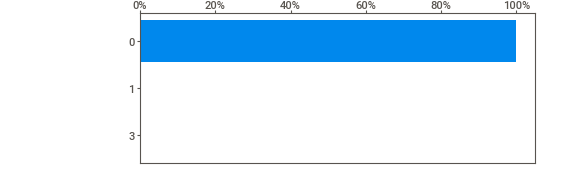
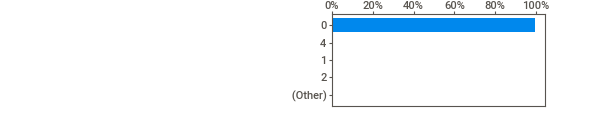
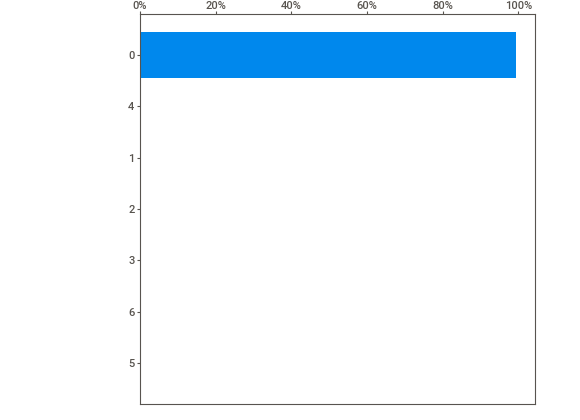
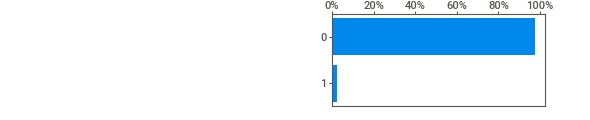
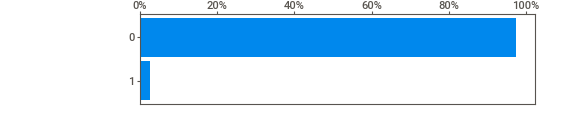
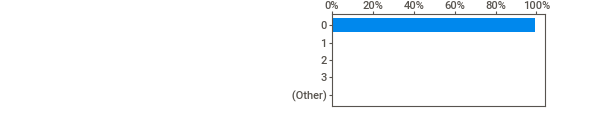
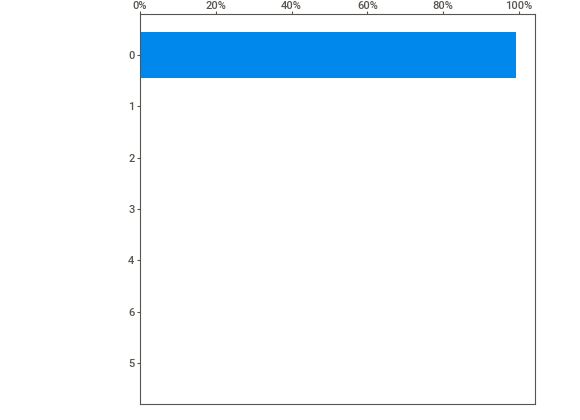
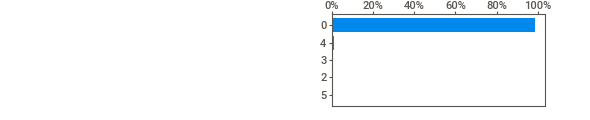
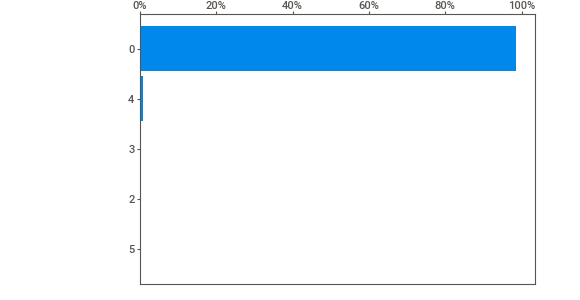
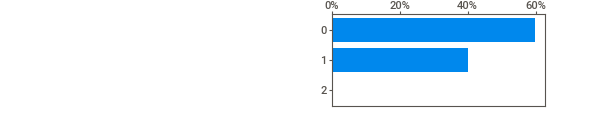
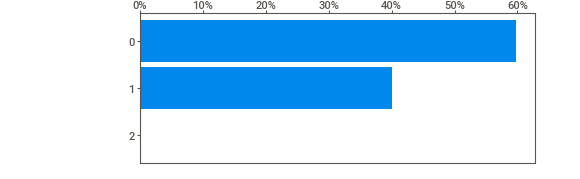
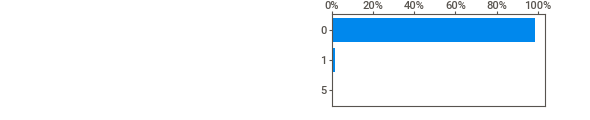
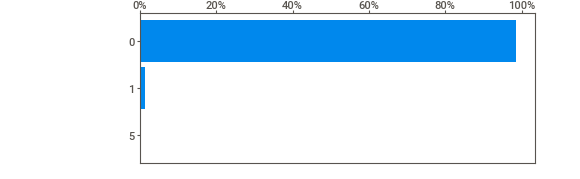
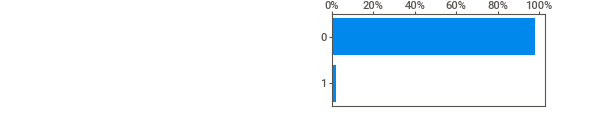
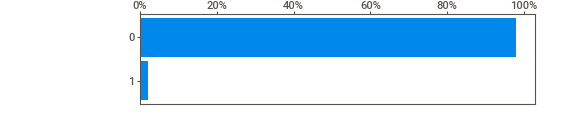
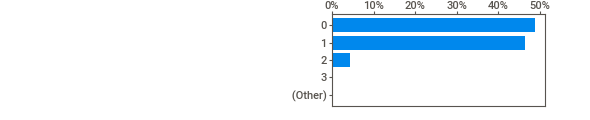
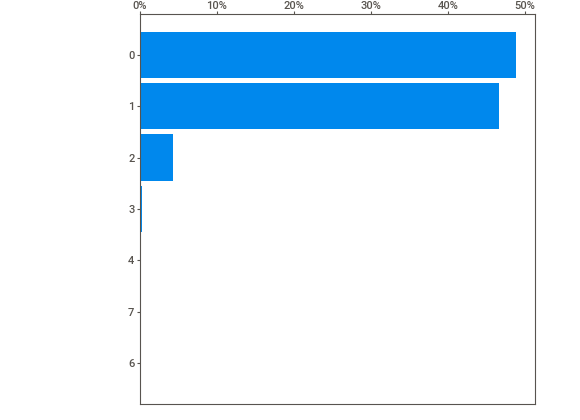
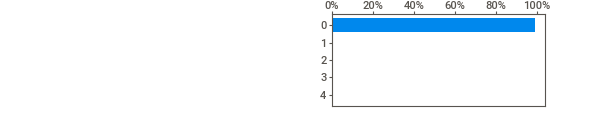
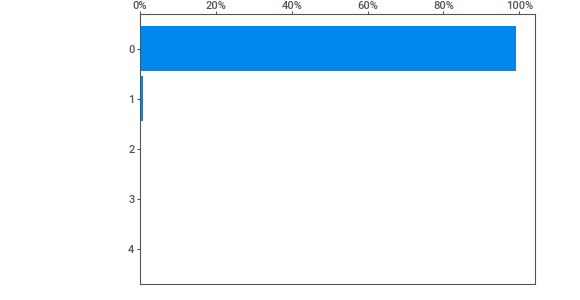
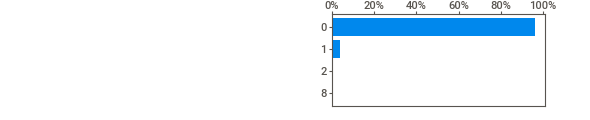
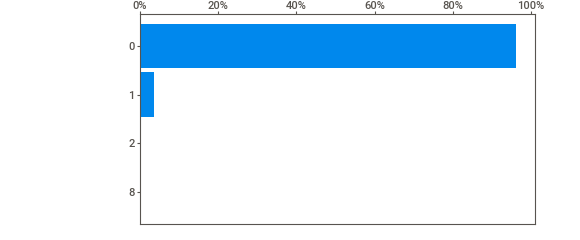
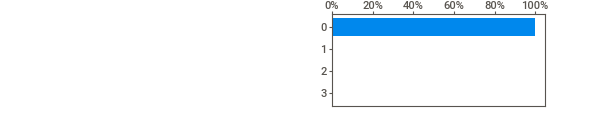
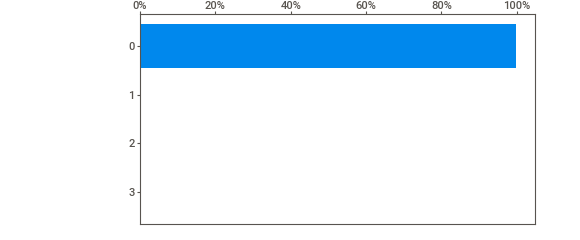
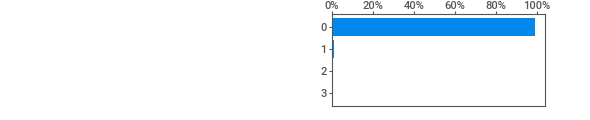
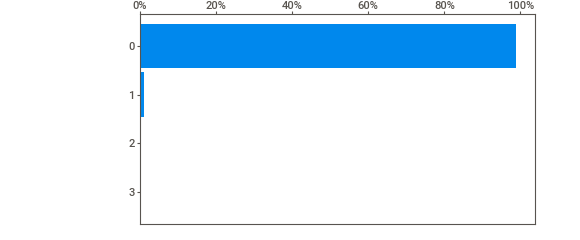
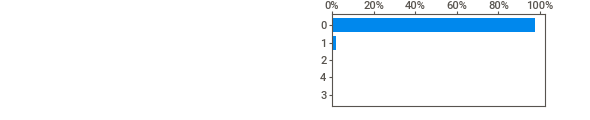
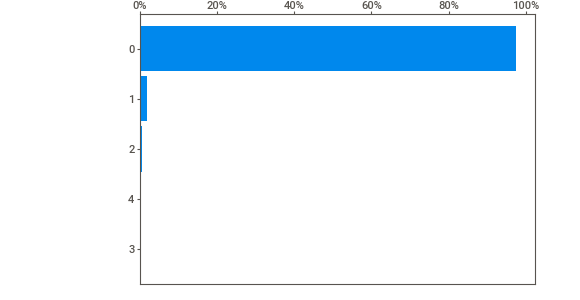
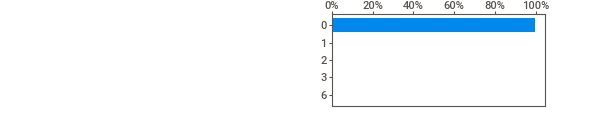
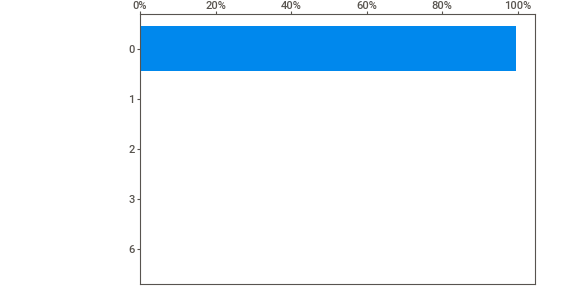
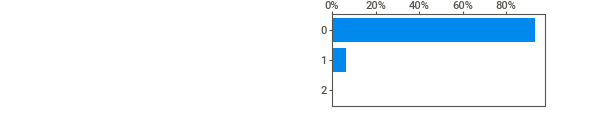
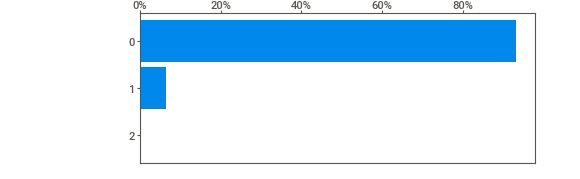
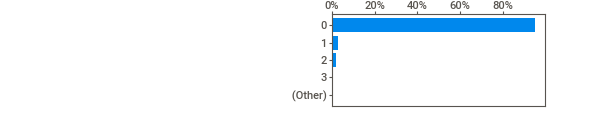
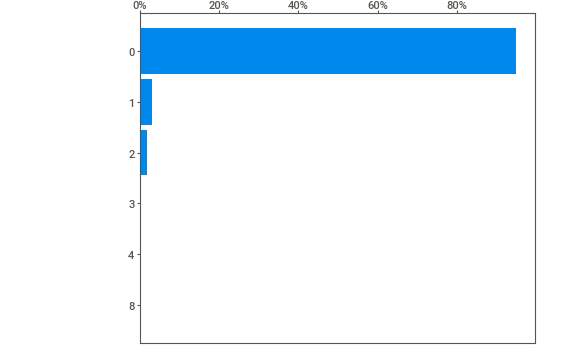
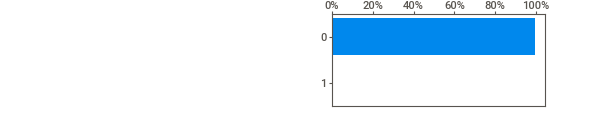
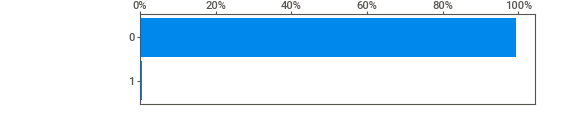
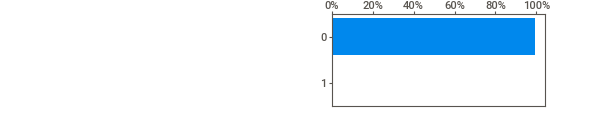
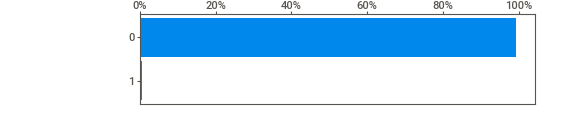
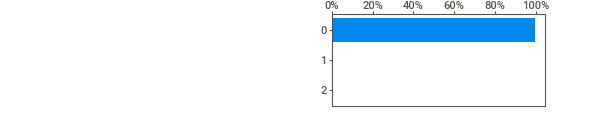
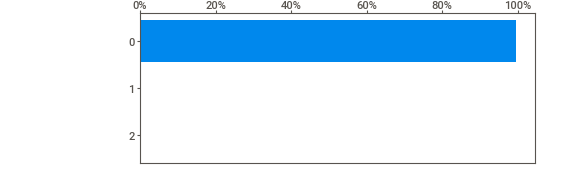
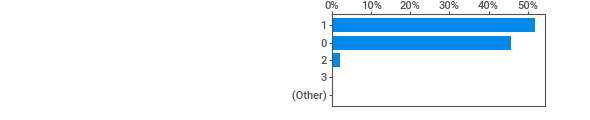
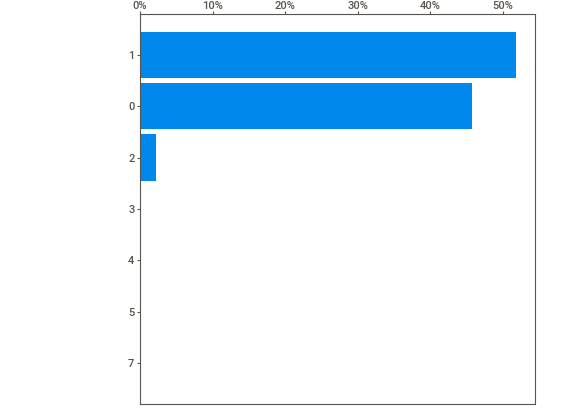
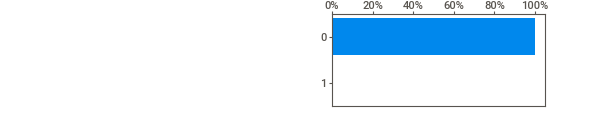
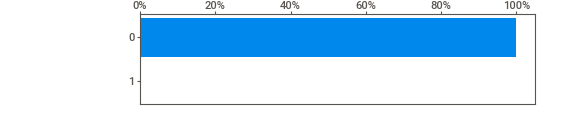
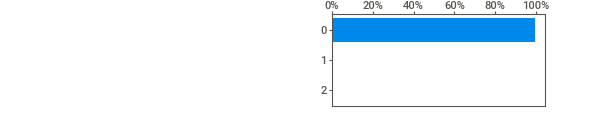
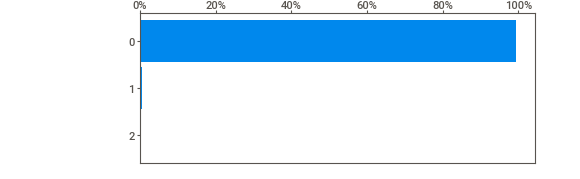
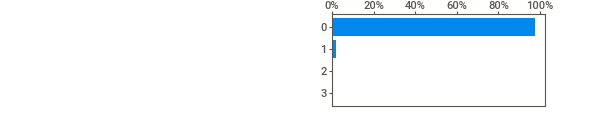
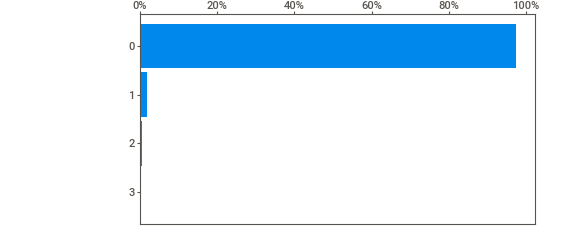
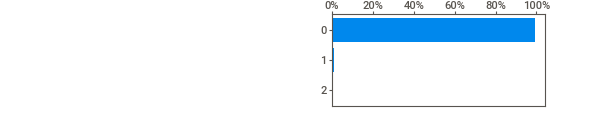
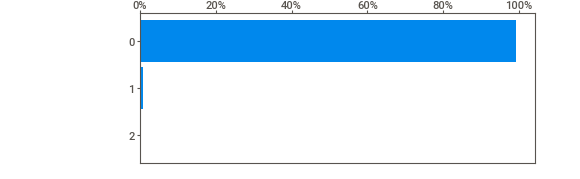
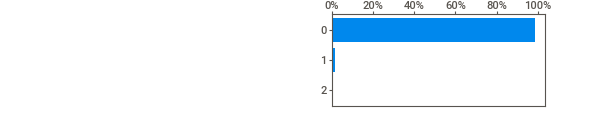
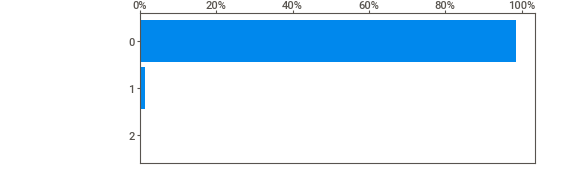
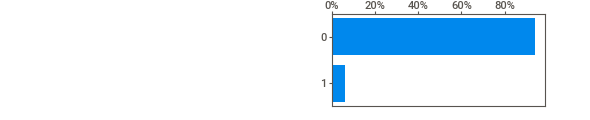
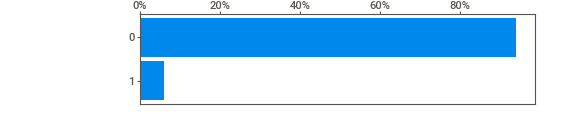
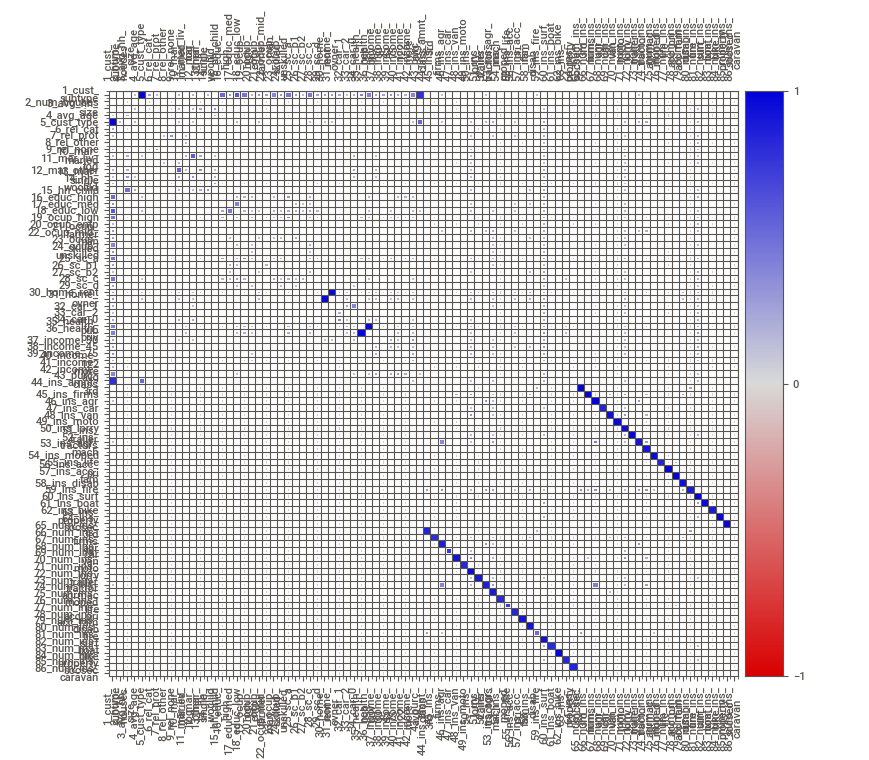
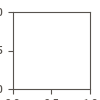

In [25]:
IPython.display.HTML('primer_analisis.html')# si no funciona display por favor mirar a HTMLs auxiliares.

In [26]:
compare_report = sv.compare([data_train, "train"],[data_test, "test"])
compare_report.show_html("compare.html")

                                             |                                                                …

Report compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
IPython.display.HTML('compare.html')# si no funciona display por favor mirar a HTMLs auxiliares.

Los resultados de comparación (compare.html), nos muestran que nuestros datos de training y test son similares. Data_test se puede usar posteriormente para las validaciones y predicciones del modelo.

La variable objetivo de este proyecto es '86_num_ins_caravan', ya que nuestra misión es crear un modelo que prediga quién estará interesadoen comprar un seguro de autocaravanas. Por tanto, vamos a proceder a analizarla. En nuestro caso, esta variable es '86_num_ins_caravan'

In [29]:
data_train ['86_num_ins_caravan'].value_counts()

0    5474
1     348
Name: 86_num_ins_caravan, dtype: int64

Procedemos a crear un data frame con un conteo de los datos de la variable objetivo.

In [30]:
df_caravan = data_train ['86_num_ins_caravan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_caravan_conteo = data_train['86_num_ins_caravan'].value_counts().reset_index()
df_caravan_pc = pd.merge(df_caravan, df_caravan_conteo, on=['index'], how='inner')
df_caravan_pc
df_caravan

index    percent
0      0  94.022673
1      1   5.977327

Observamos que 5474 personas no poseen una poliza de seguro para caravana, lo que equivale a un poco más del 94% de la muestra, mientras que solo 348 poseen una póliza de caravana, el equivalente a casi el 6% de la muestra.

# Análisis de la Correlación

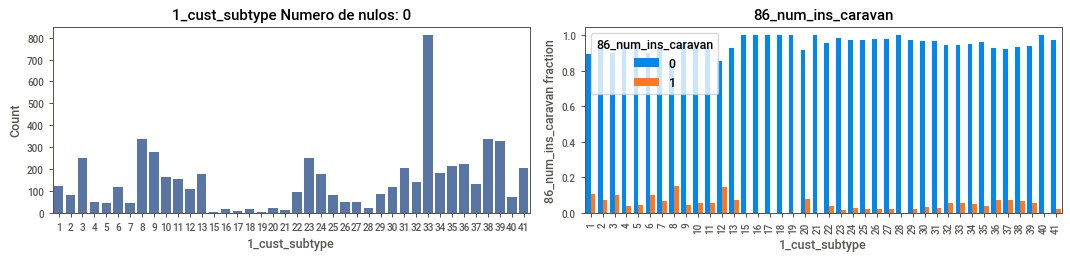

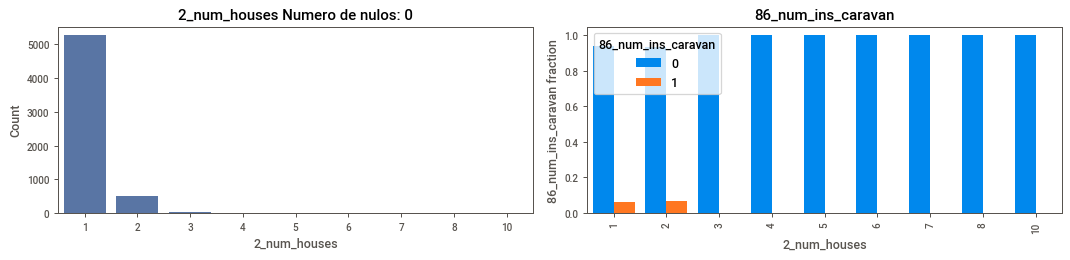

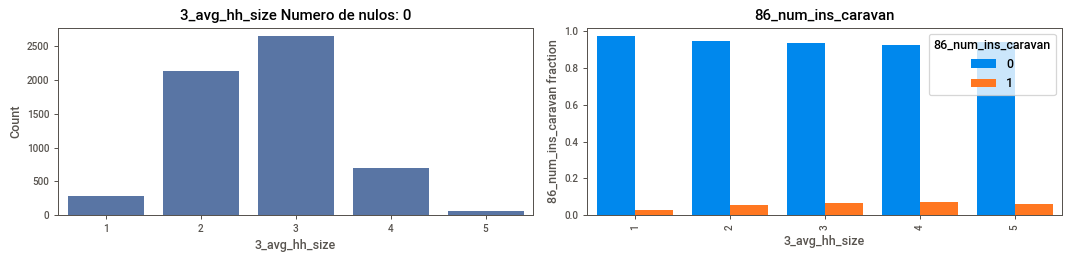

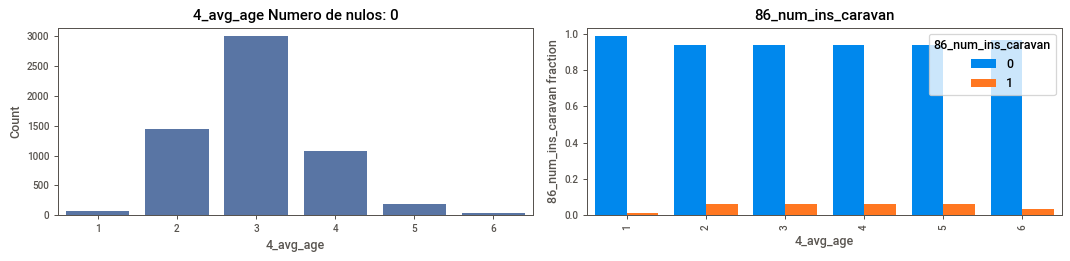

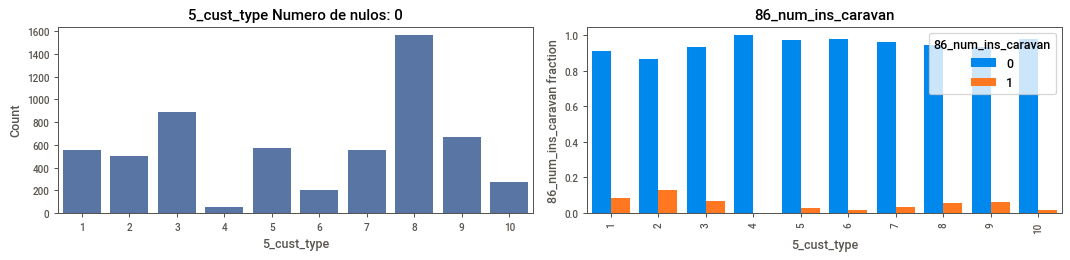

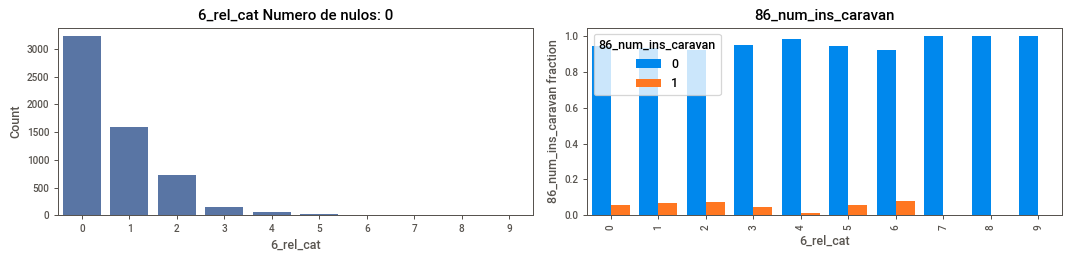

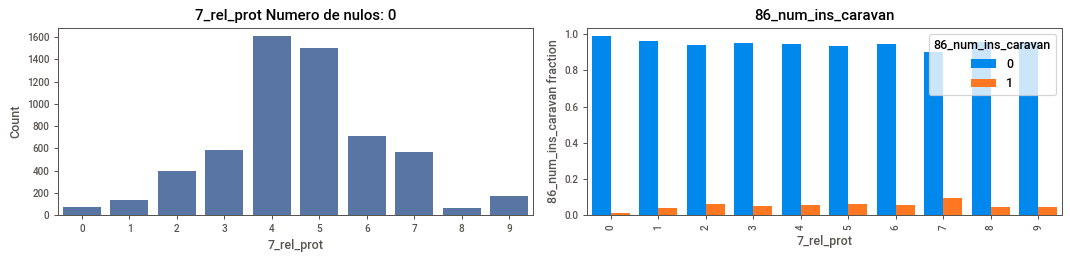

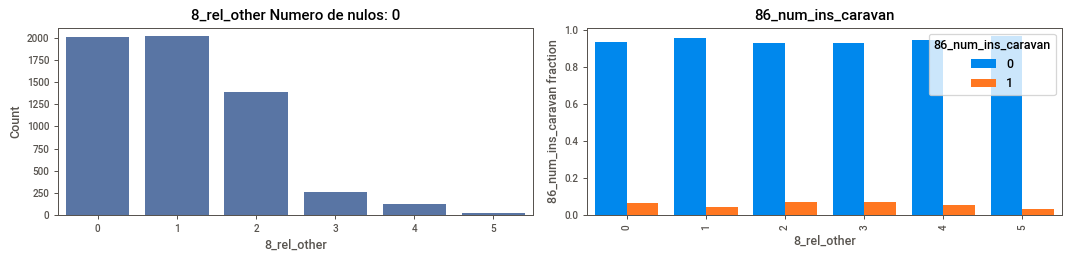

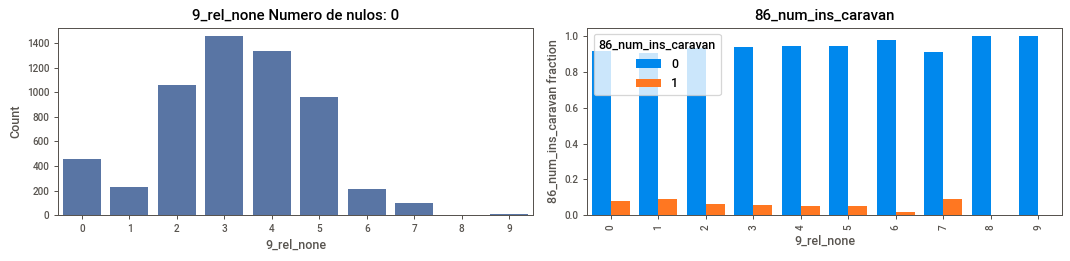

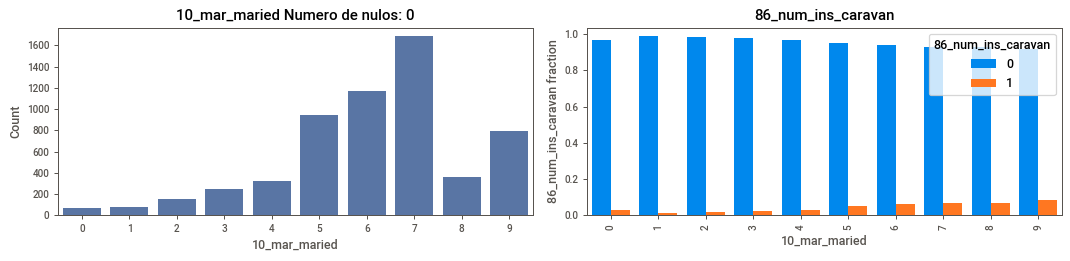

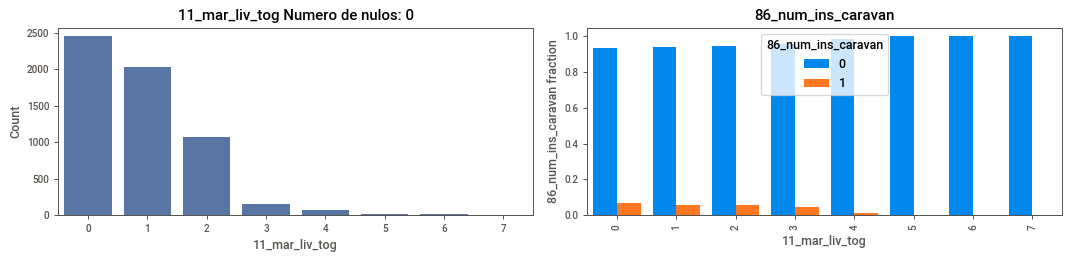

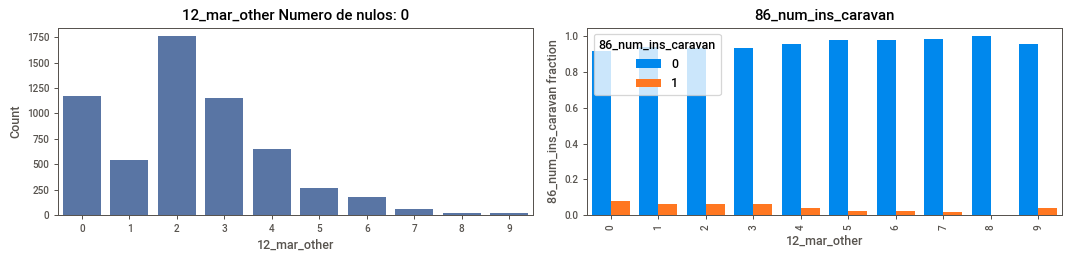

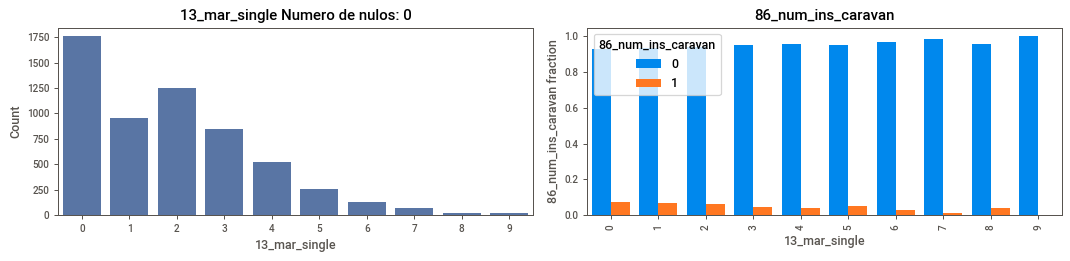

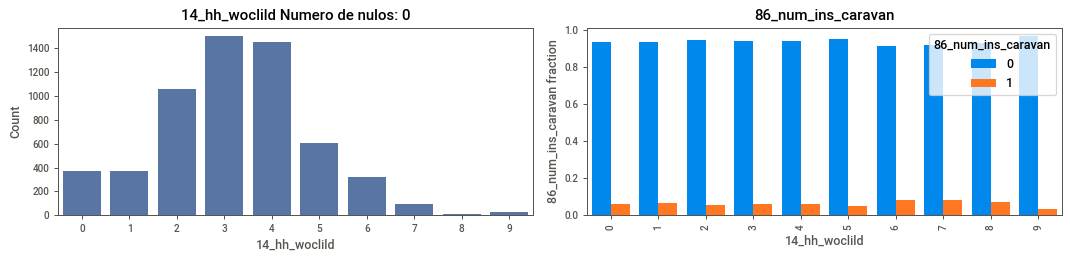

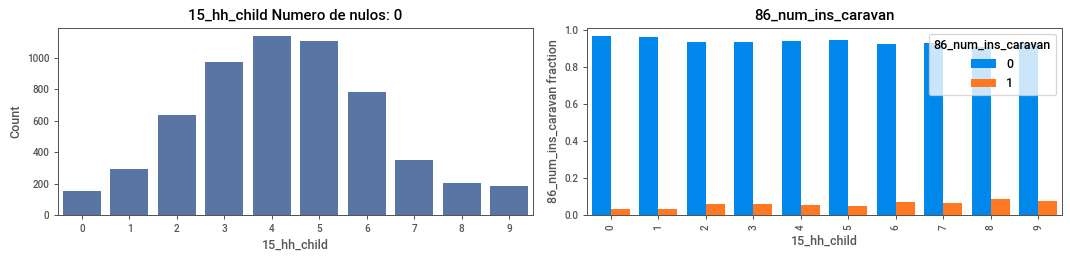

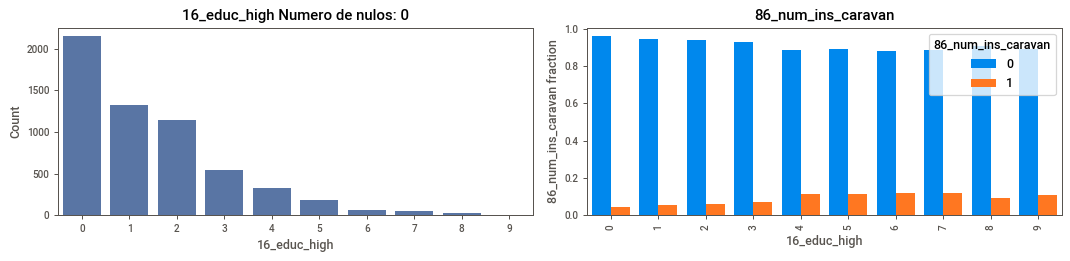

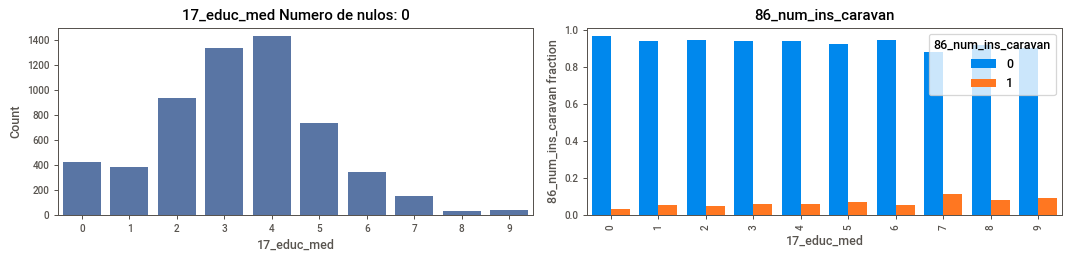

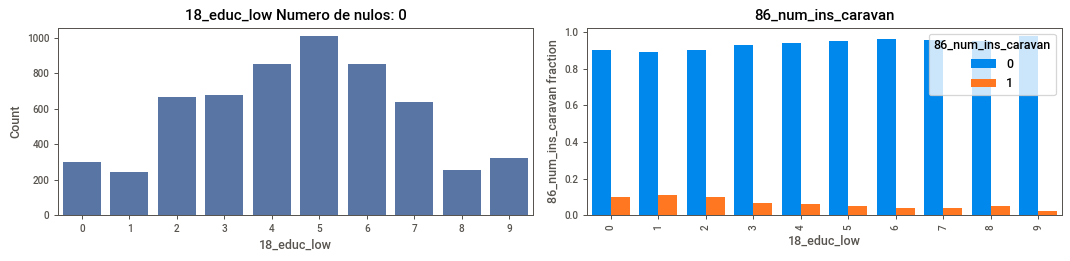

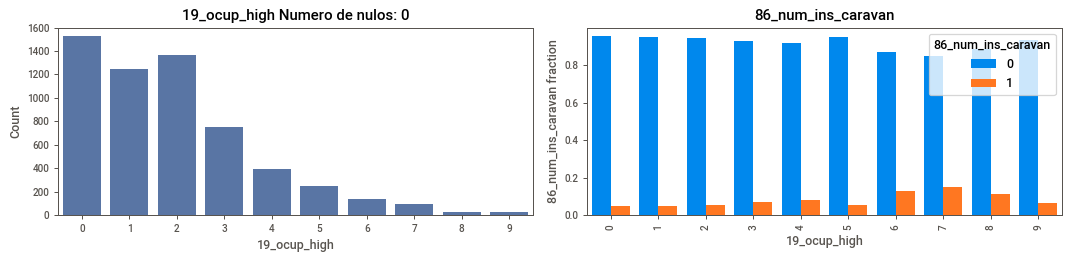

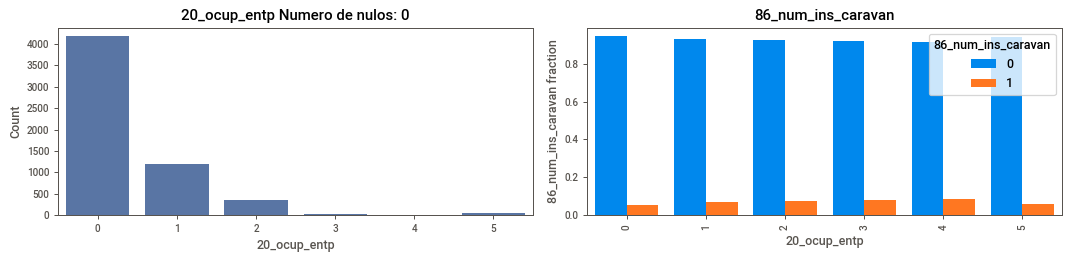

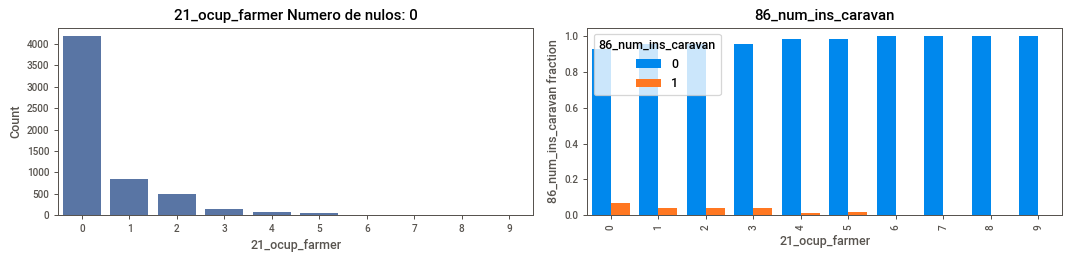

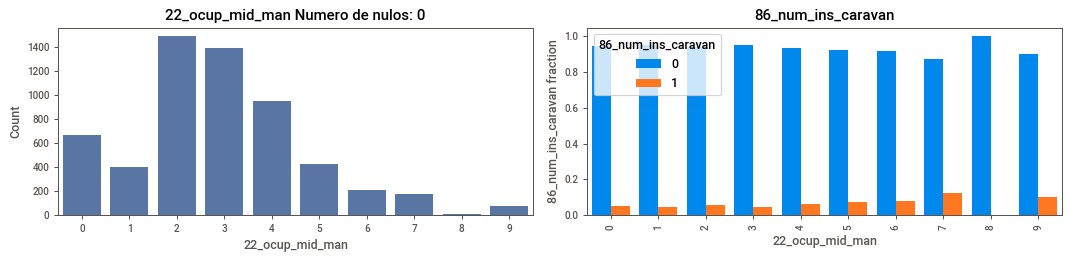

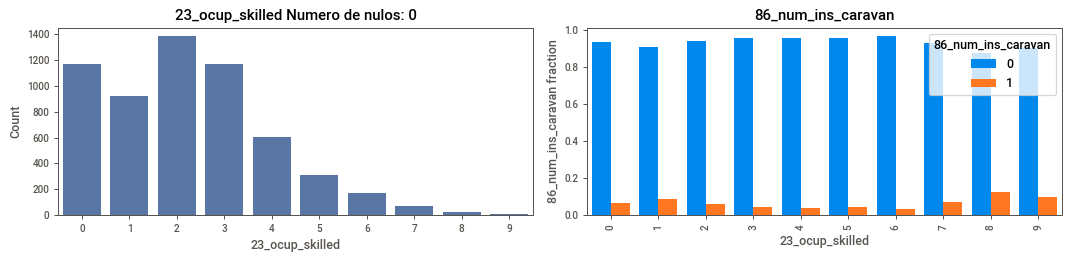

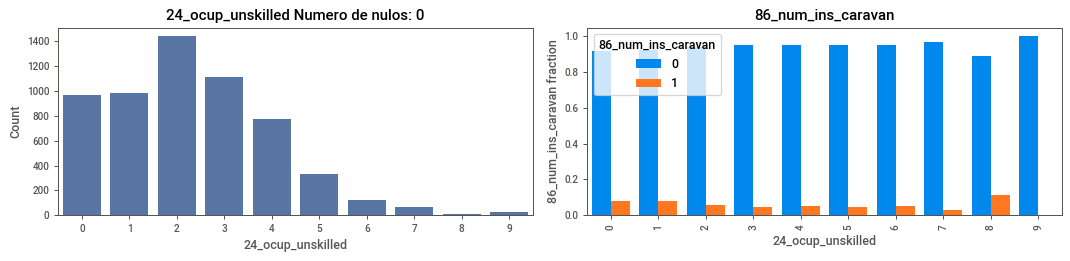

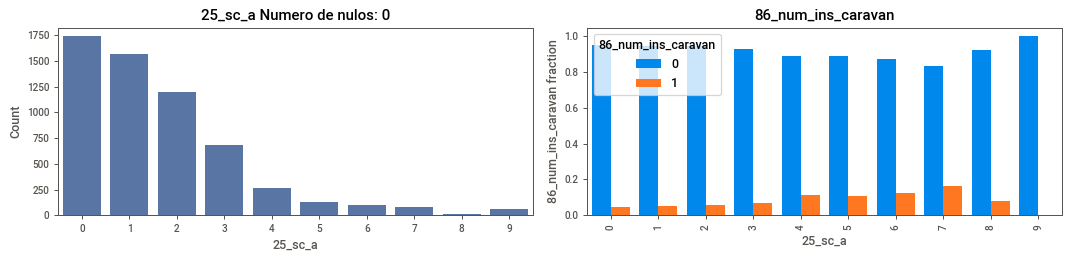

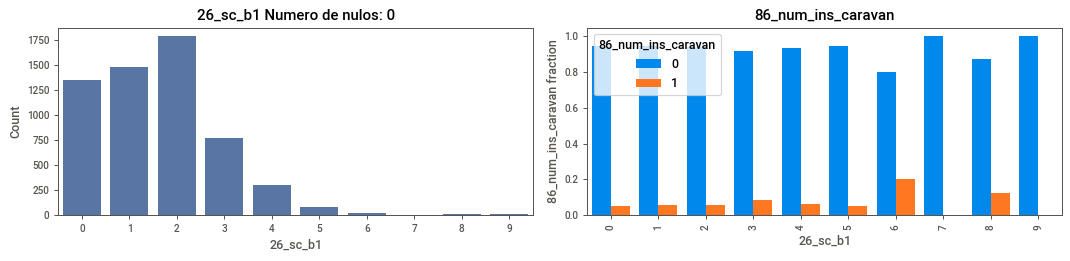

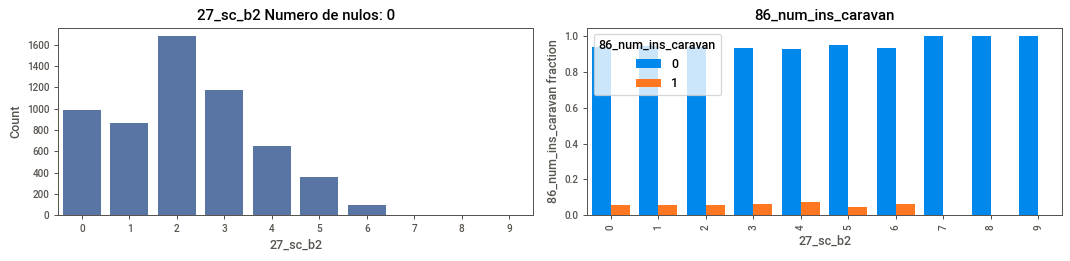

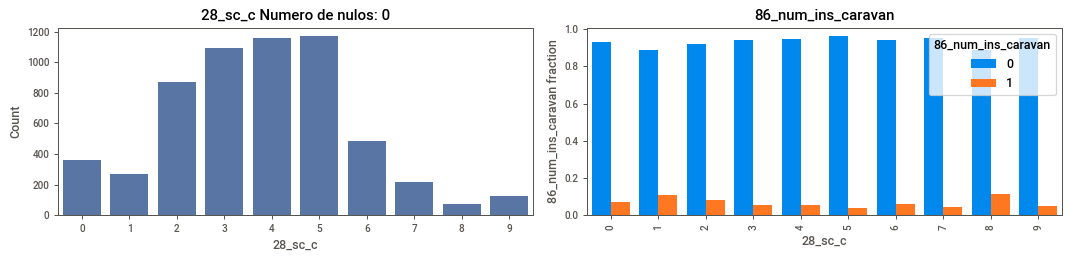

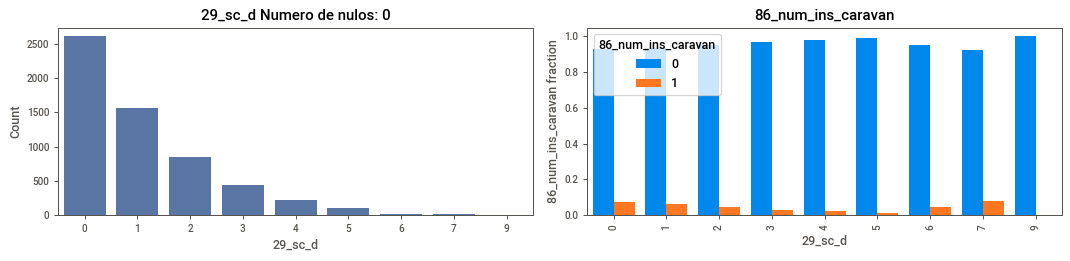

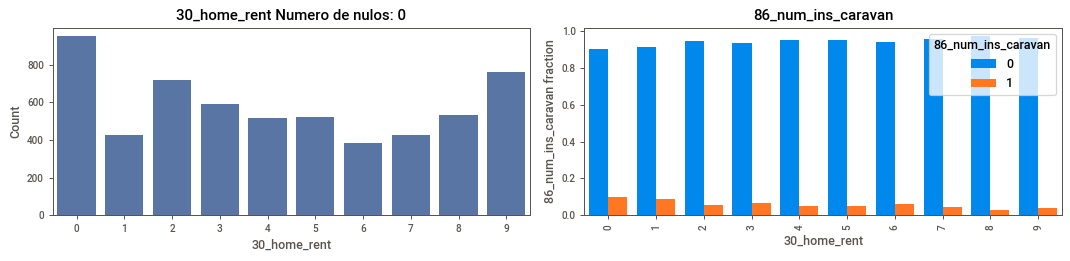

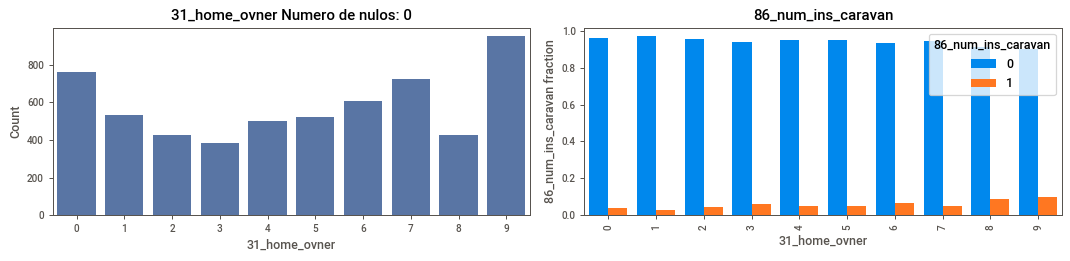

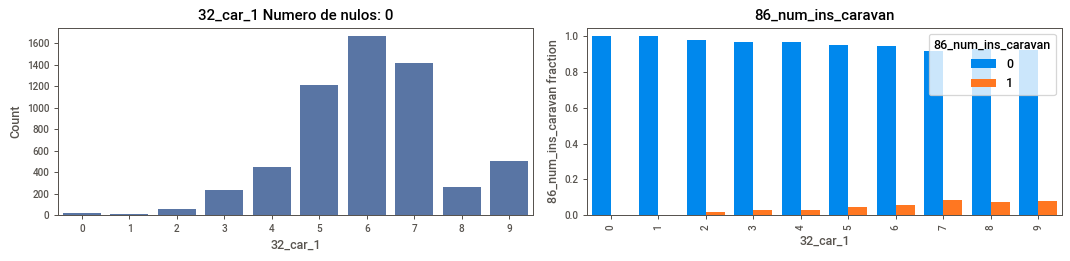

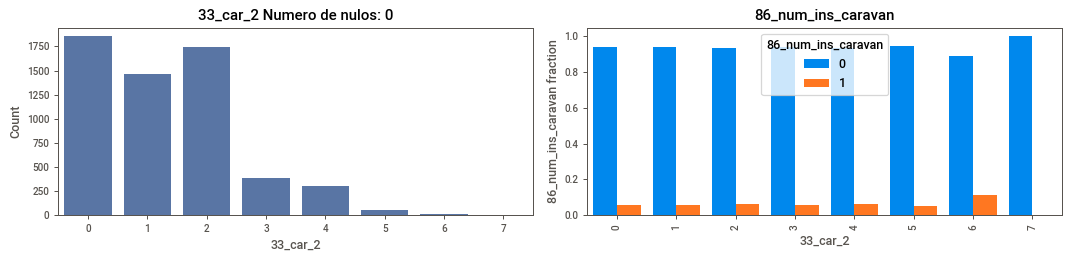

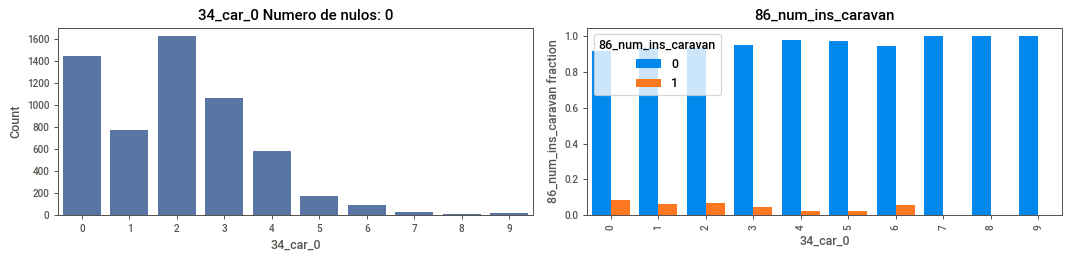

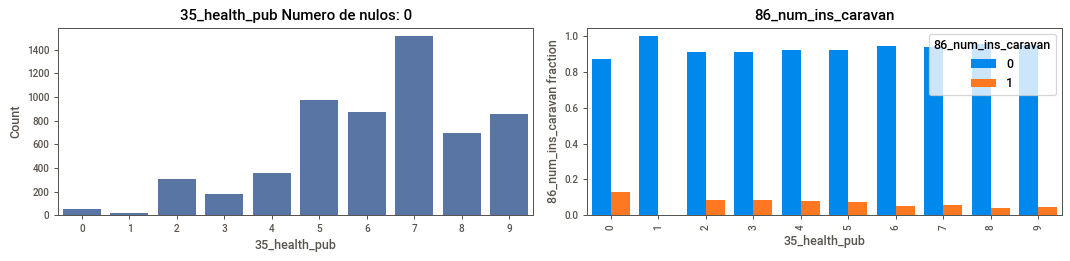

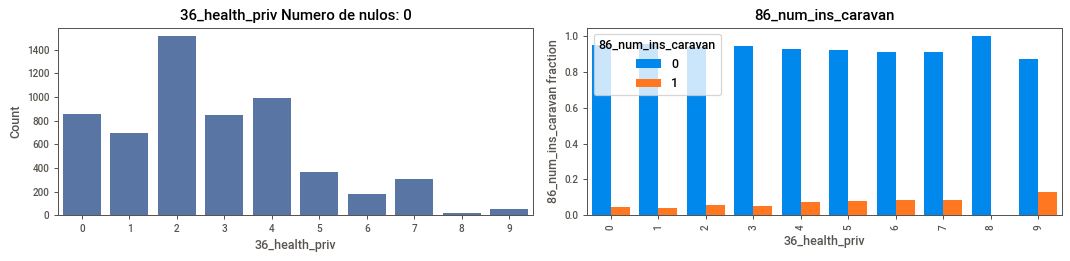

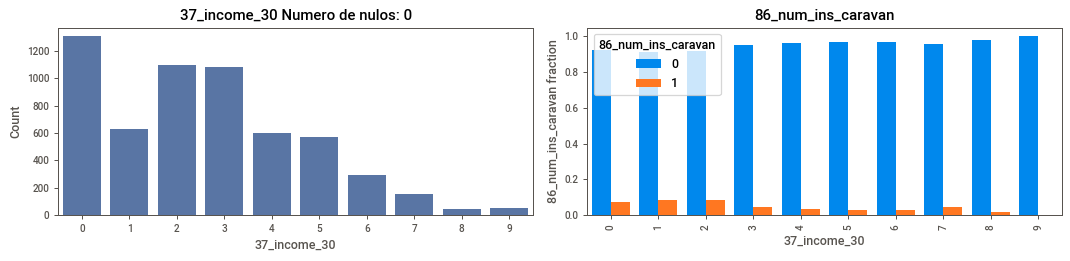

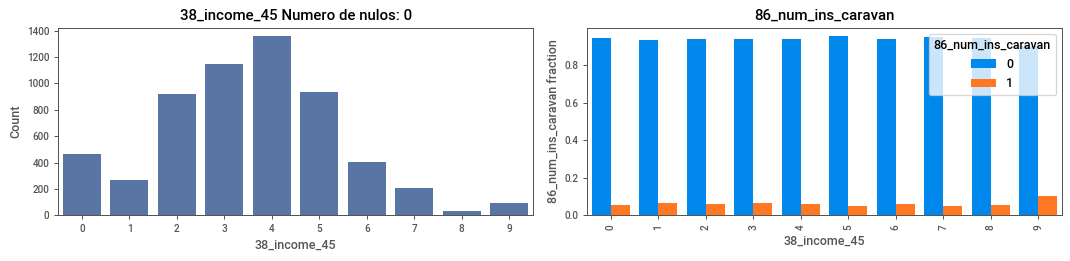

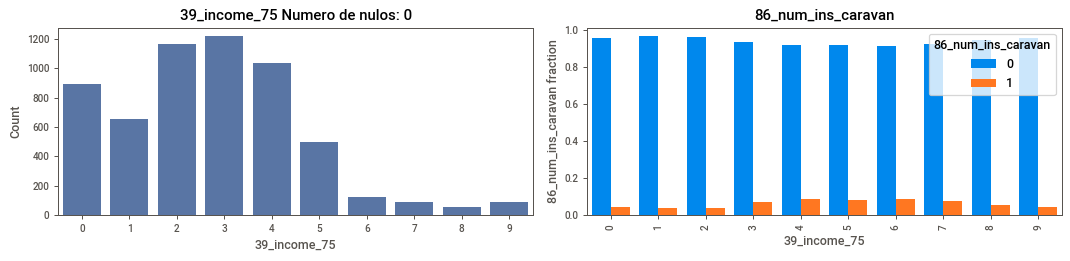

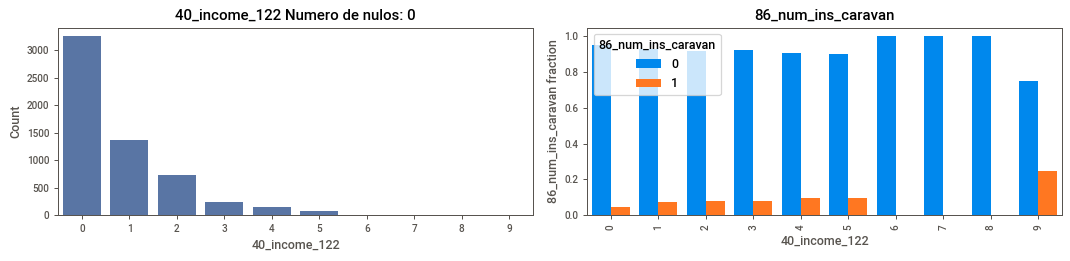

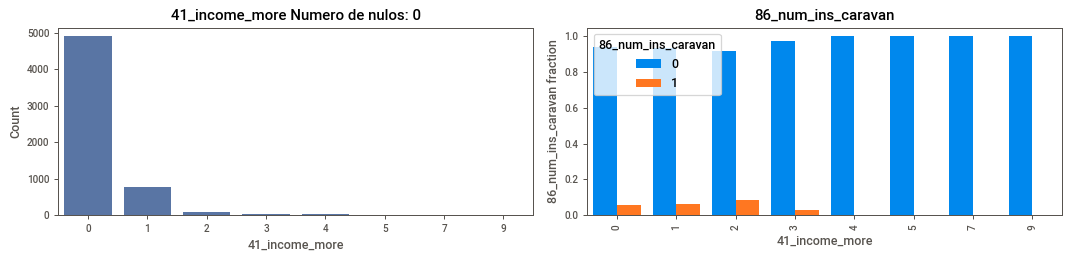

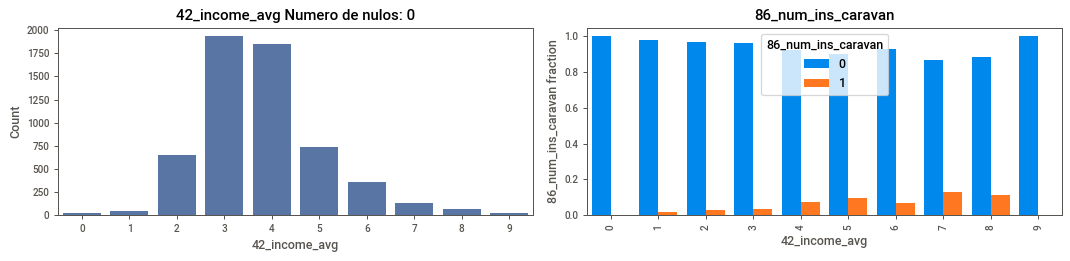

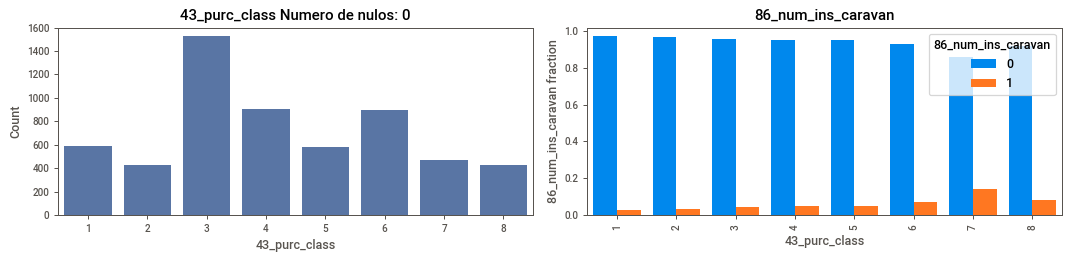

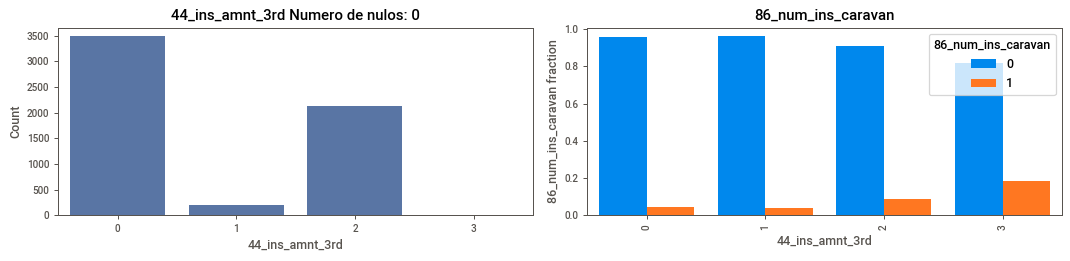

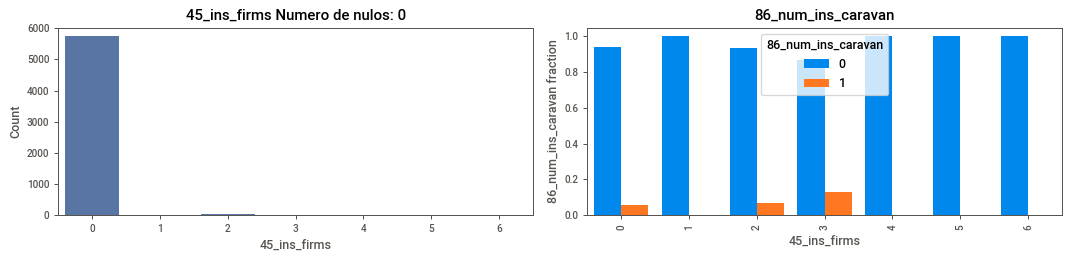

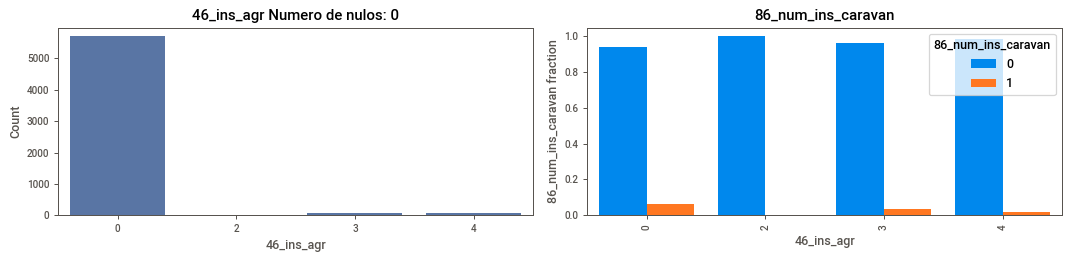

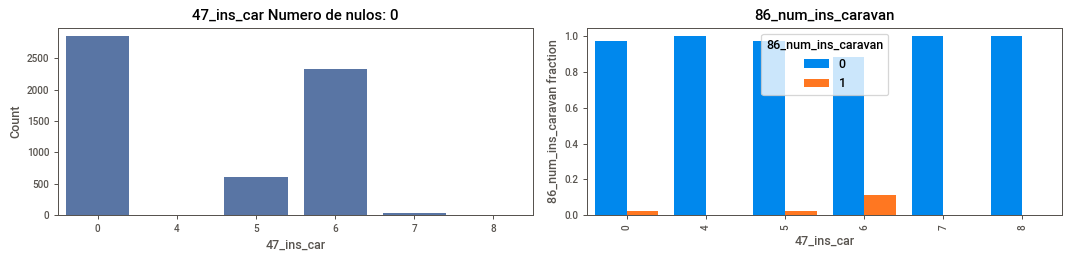

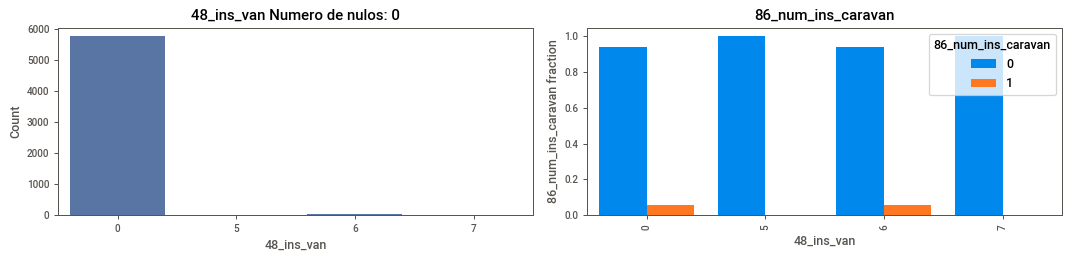

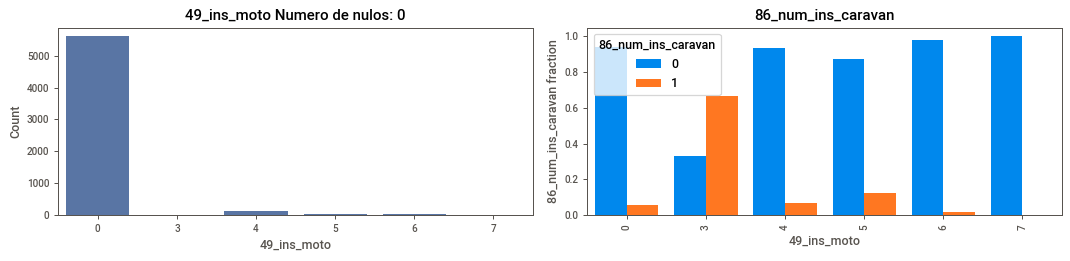

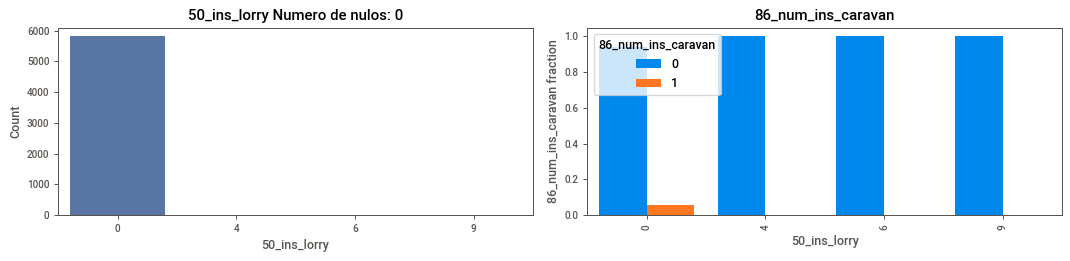

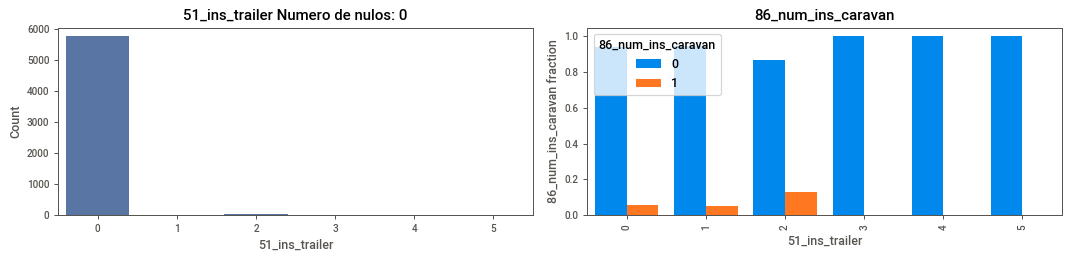

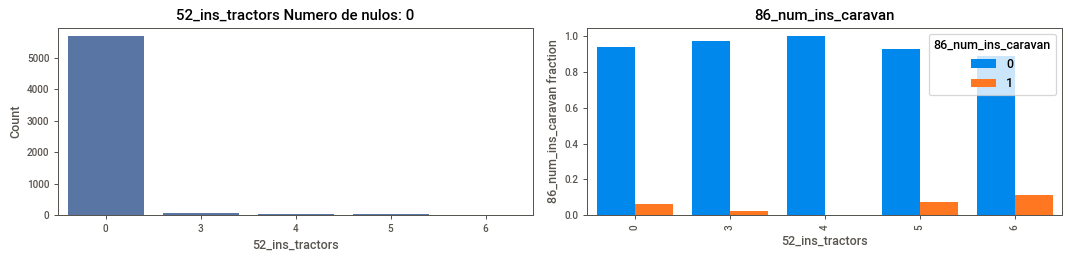

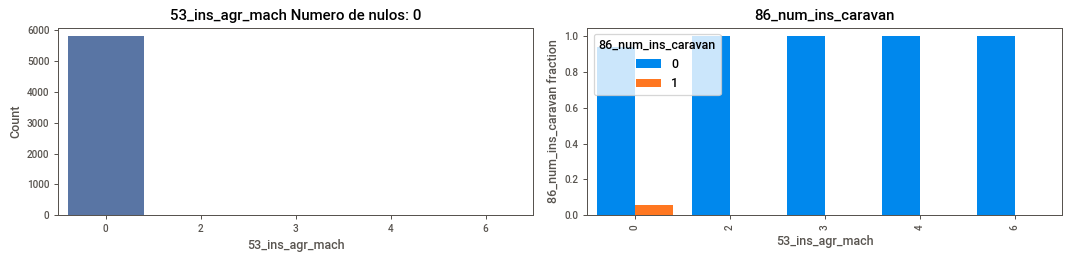

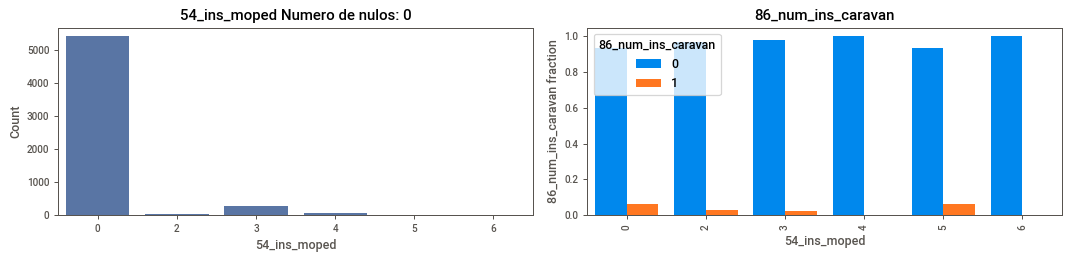

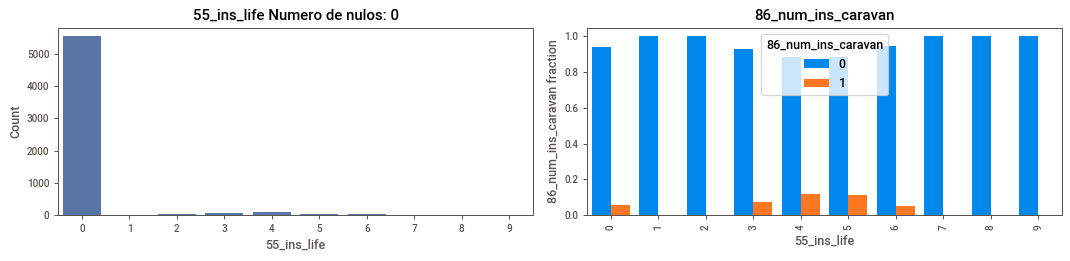

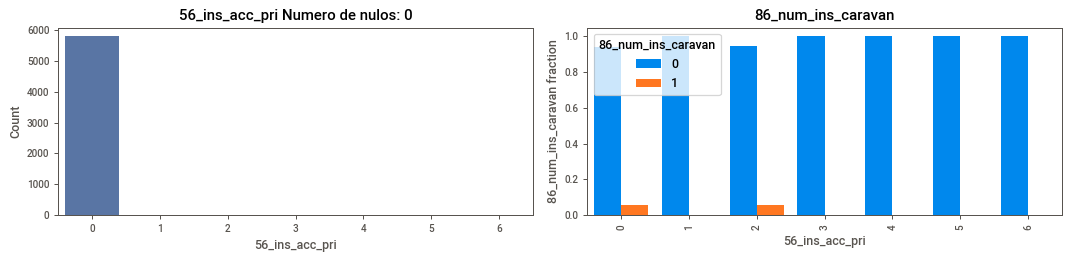

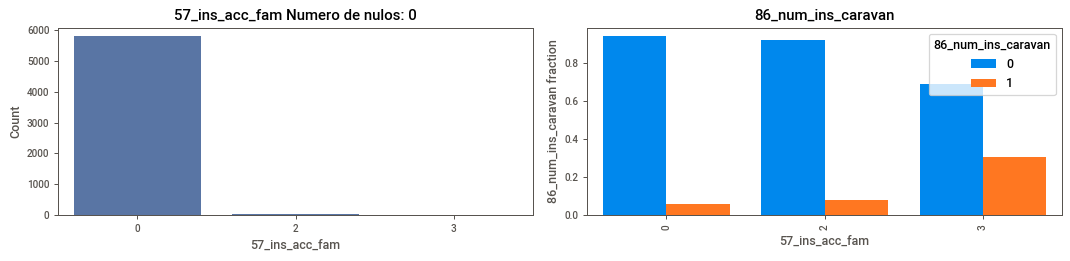

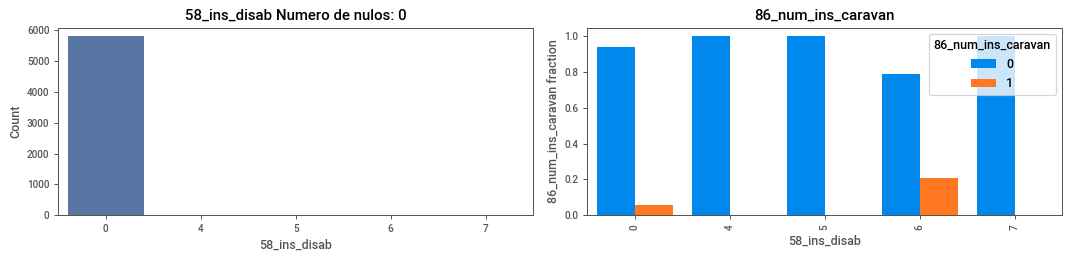

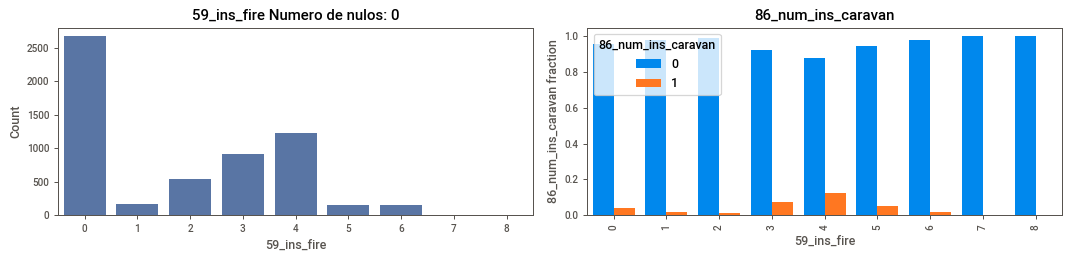

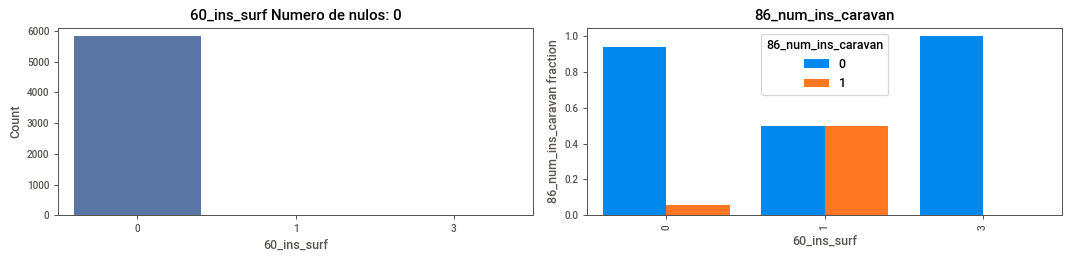

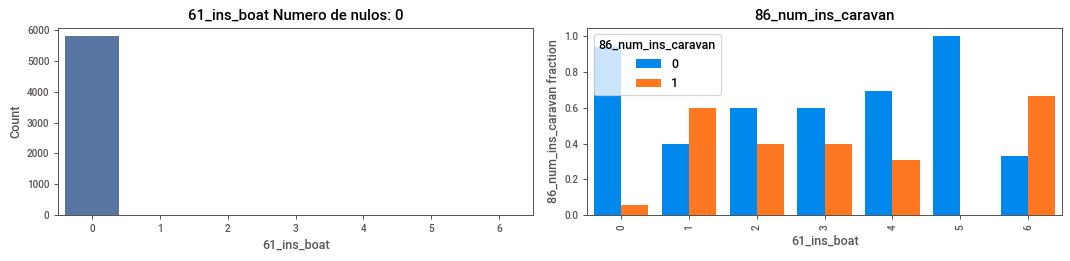

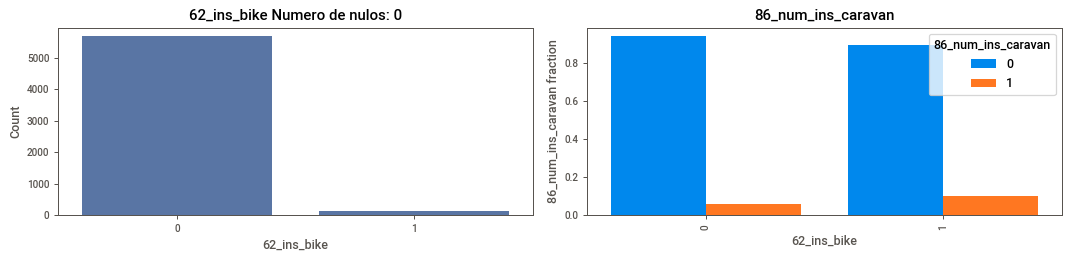

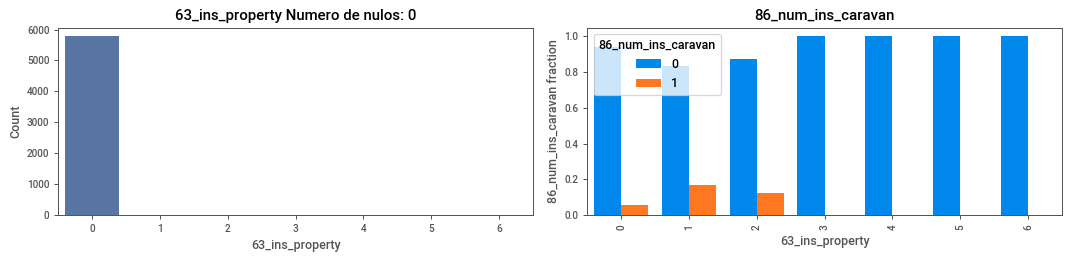

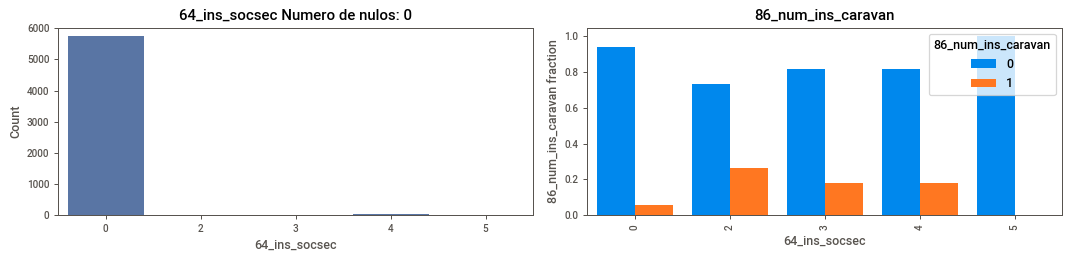

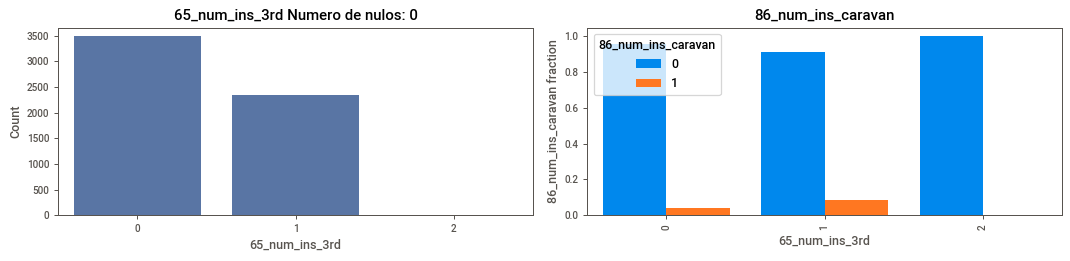

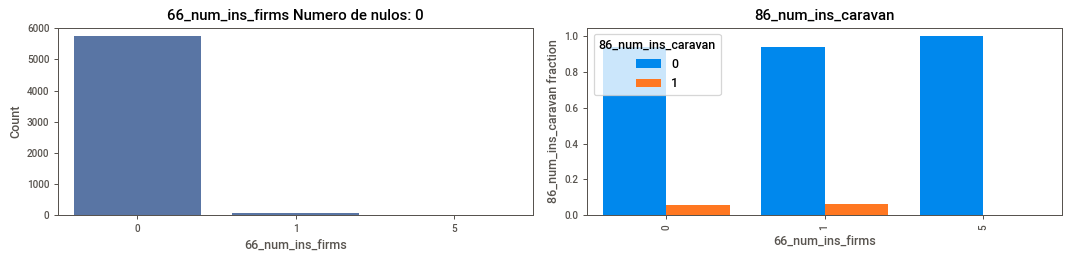

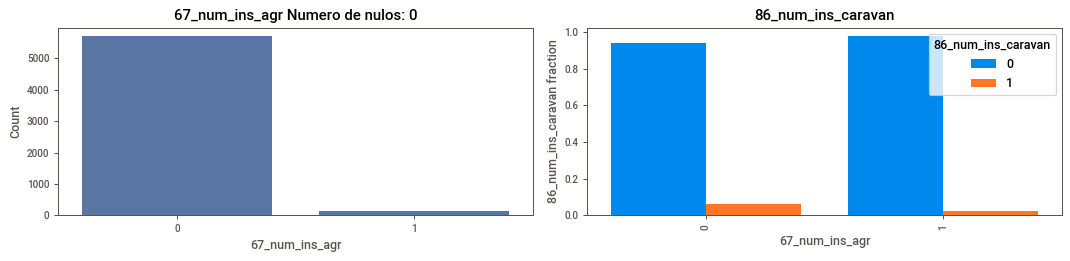

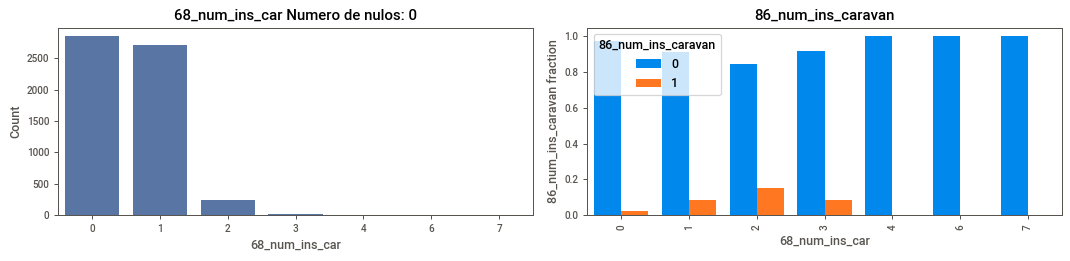

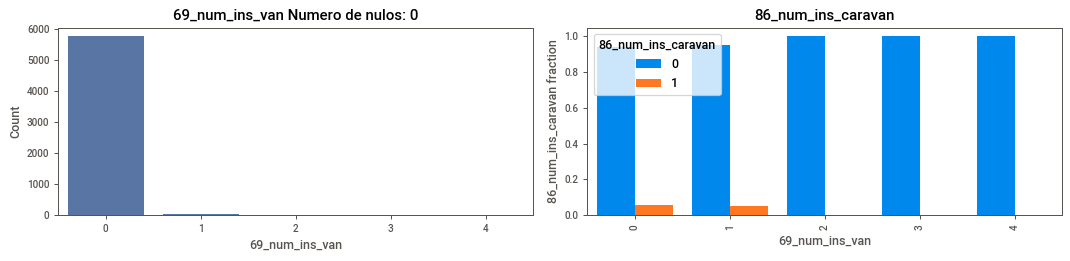

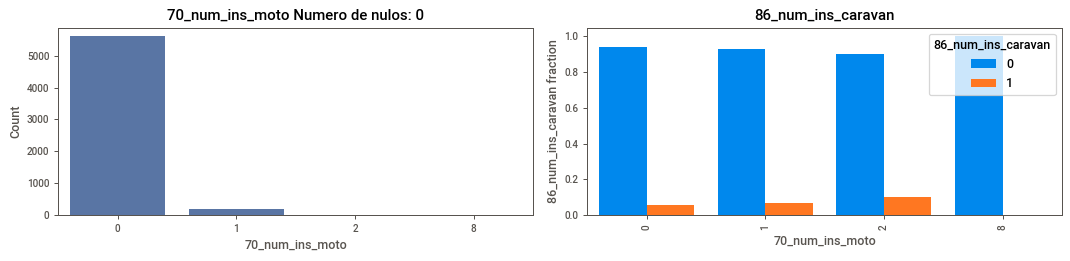

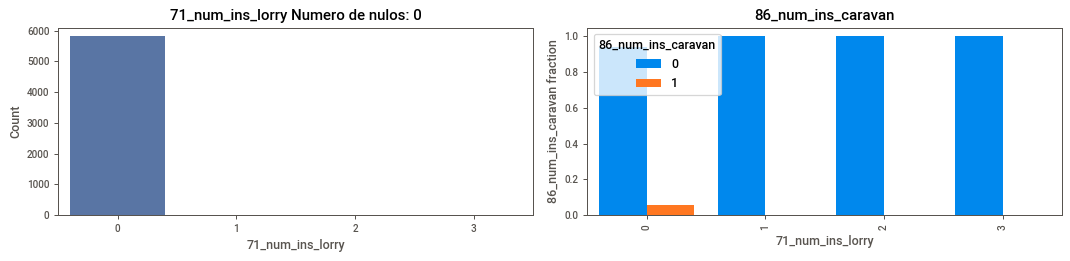

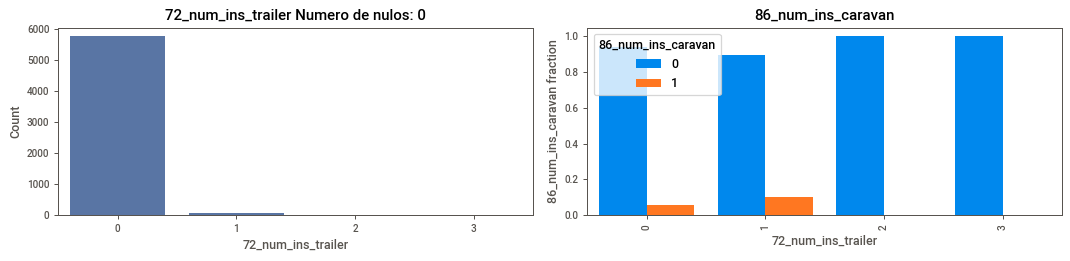

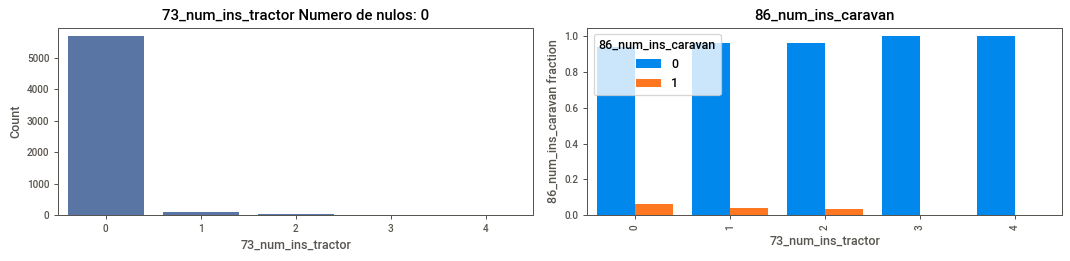

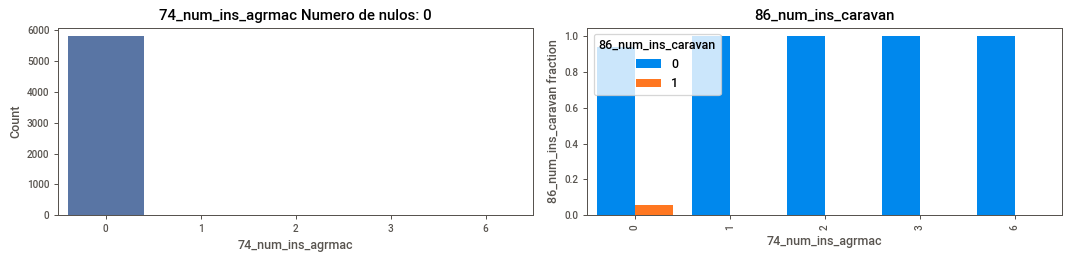

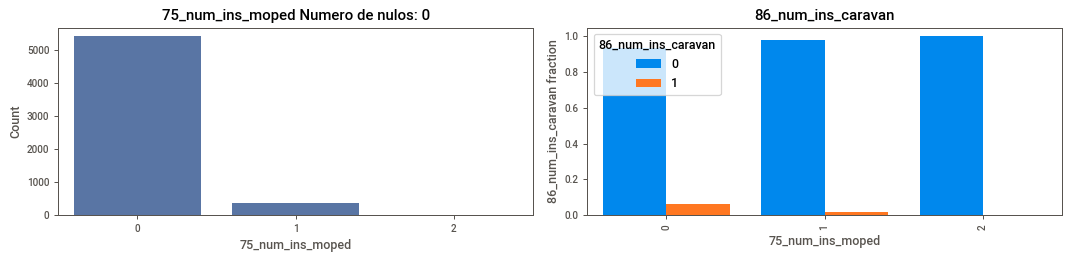

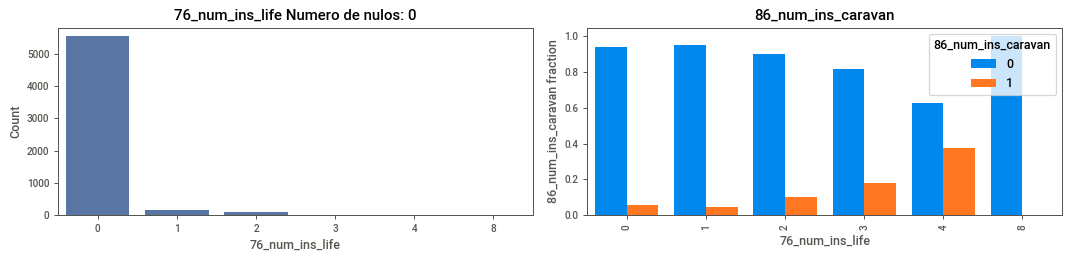

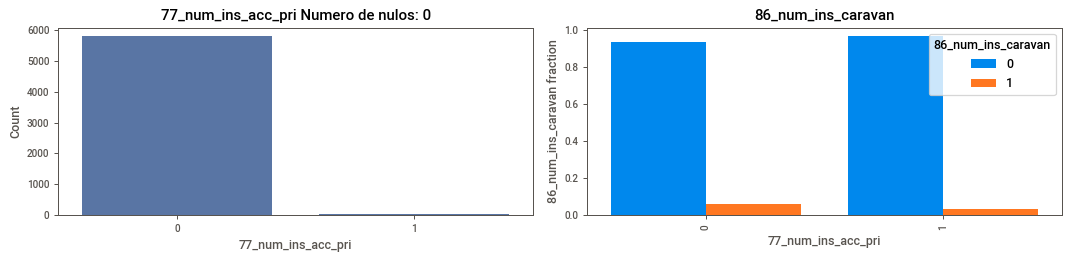

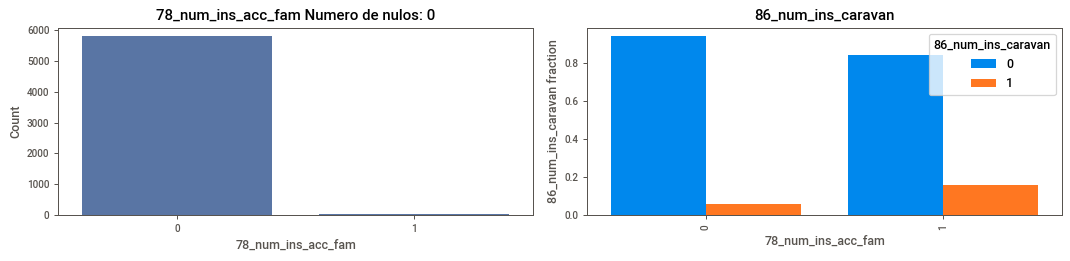

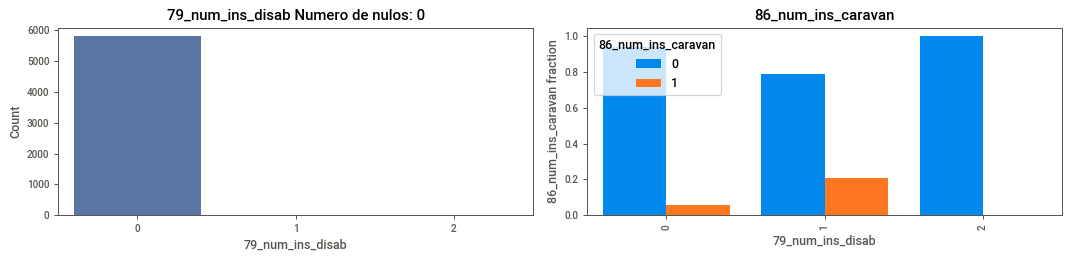

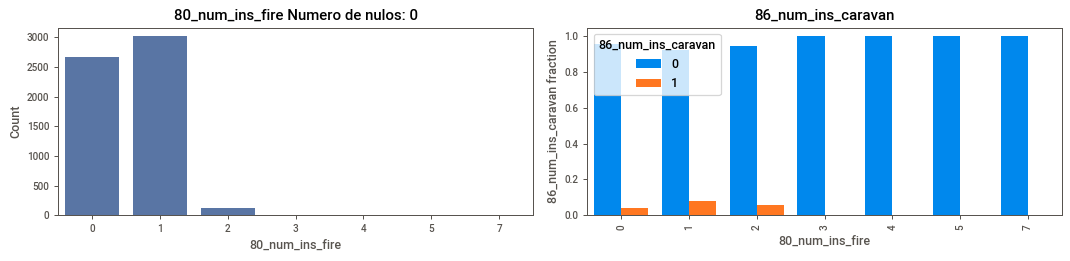

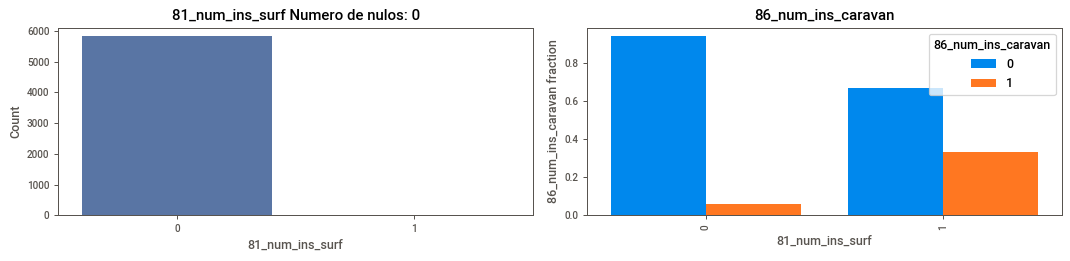

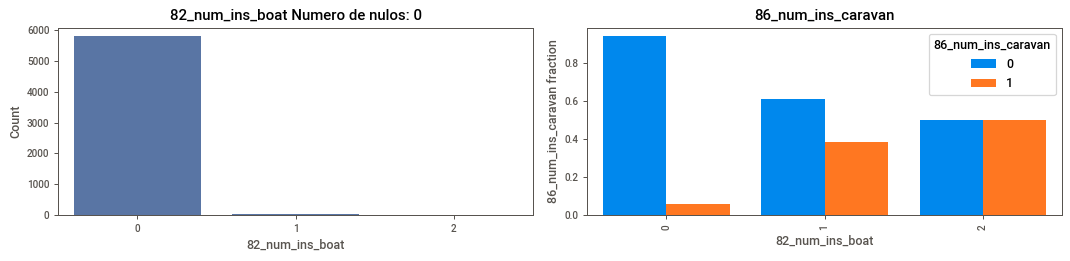

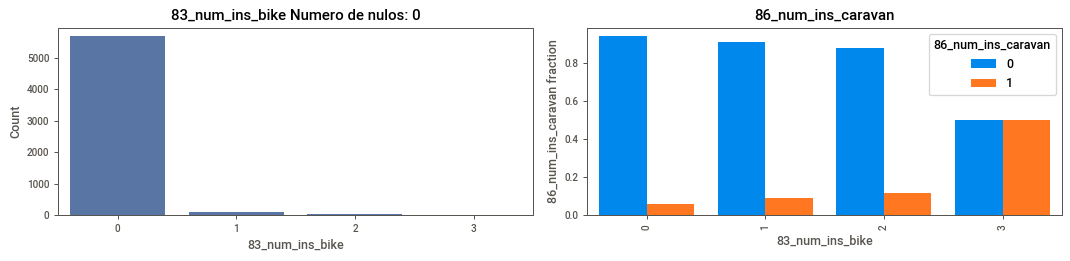

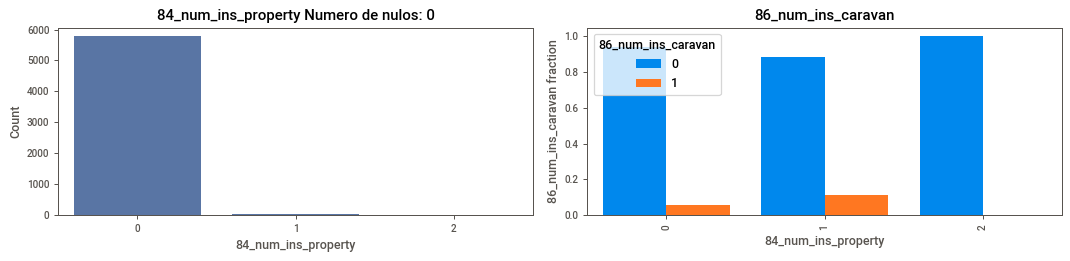

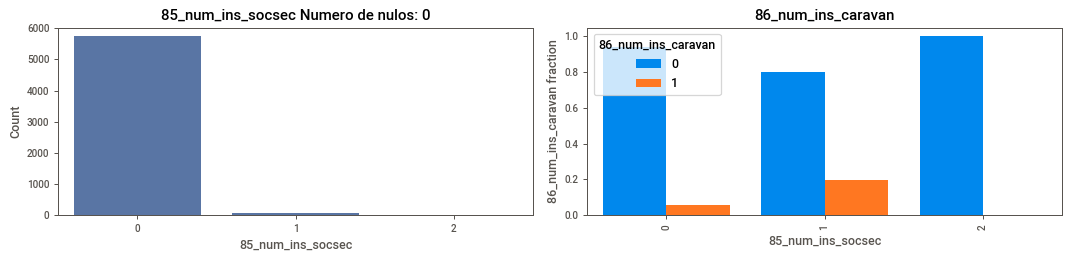

In [31]:
# warnings.filterwarnings('ignore')
def plot_feature(df, col_name, isContinuous, target):
   
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)

    count_null = df[col_name].isnull().sum()
    if isContinuous:

        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name+ ' Numero de nulos: '+str(count_null))
    plt.xticks(rotation = 90)


    if isContinuous:
        sns.boxplot(x=col_name, y=target, data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by '+target)
    else:
        data = df.groupby(col_name)[target].value_counts(normalize=True).to_frame('proportion').reset_index()
        data.columns = [i, target, 'proportion']
        #sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        ax2.set_ylabel(target+' fraction')
        ax2.set_title(target)
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)

    plt.tight_layout()
for i in list(data_train.columns):
    if (data_train[i].dtype==float) & (i!='Number_of_mobile_home_policies'):
        plt_feature(data_train, col_name=i, isContinuous=True, target='86_num_ins_caravan')
    elif  i!='86_num_ins_caravan':
        plot_feature(data_train, col_name=i, isContinuous=False, target='86_num_ins_caravan')

Con data_trian.describe() obtenemos los principales estadísticos de las variables de nuestro modelo.

In [32]:
data_train.describe()

1_cust_subtype  2_num_houses  3_avg_hh_size    4_avg_age  5_cust_type  \
count     5822.000000   5822.000000    5822.000000  5822.000000  5822.000000   
mean        24.253349      1.110615       2.678805     2.991240     5.773617   
std         12.846706      0.405842       0.789835     0.814589     2.856760   
min          1.000000      1.000000       1.000000     1.000000     1.000000   
25%         10.000000      1.000000       2.000000     2.000000     3.000000   
50%         30.000000      1.000000       3.000000     3.000000     7.000000   
75%         35.000000      1.000000       3.000000     3.000000     8.000000   
max         41.000000     10.000000       5.000000     6.000000    10.000000   

         6_rel_cat   7_rel_prot  8_rel_other   9_rel_none  10_mar_maried  ...  \
count  5822.000000  5822.000000  5822.000000  5822.000000    5822.000000  ...   
mean      0.696496     4.626932     1.069907     3.258502       6.183442  ...   
std       1.003234     1.715843     1.017503     1.597647       1.909482  ...   
min       0.000000     0.000000     0.000000     0.000000       0.000000  ...   
25%       0.000000     4.000000     0.000000     2.000000       5.000000  ...   
50%       0.000000     5.000000     1.000000     3.000000       6.000000  ...   
75%       1.000000     6.000000     2.000000     4.000000       7.000000  ...   
max       9.000000     9.000000     5.000000     9.000000       9.000000  ...   

       77_num_ins_acc_pri  78_num_ins_acc_fam  79_num_ins_disab  \
count         5822.000000         5822.000000       5822.000000   
mean             0.005325            0.006527          0.004638   
std              0.072782            0.080532          0.077403   
min              0.000000            0.000000          0.000000   
25%              0.000000            0.000000          0.000000   
50%              0.000000            0.000000          0.000000   
75%              0.000000            0.000000          0.000000   
max              1.000000            1.000000          2.000000   

       80_num_ins_fire  81_num_ins_surf  82_num_ins_boat  83_num_ins_bike  \
count      5822.000000      5822.000000      5822.000000      5822.000000   
mean          0.570079         0.000515         0.006012         0.031776   
std           0.562058         0.022696         0.081632         0.210986   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           1.000000         0.000000         0.000000         0.000000   
max           7.000000         1.000000         2.000000         3.000000   

       84_num_ins_property  85_num_ins_socsec  86_num_ins_caravan  
count          5822.000000        5822.000000         5822.000000  
mean              0.007901           0.014256            0.059773  
std               0.090463           0.119996            0.237087  
min               0.000000           0.000000            0.000000  
25%               0.000000           0.000000            0.000000  
50%               0.000000           0.000000            0.000000  
75%               0.000000           0.000000            0.000000  
max               2.000000           2.000000            1.000000  

[8 rows x 86 columns]

In [33]:
corr = data_train.corr(method = 'spearman')

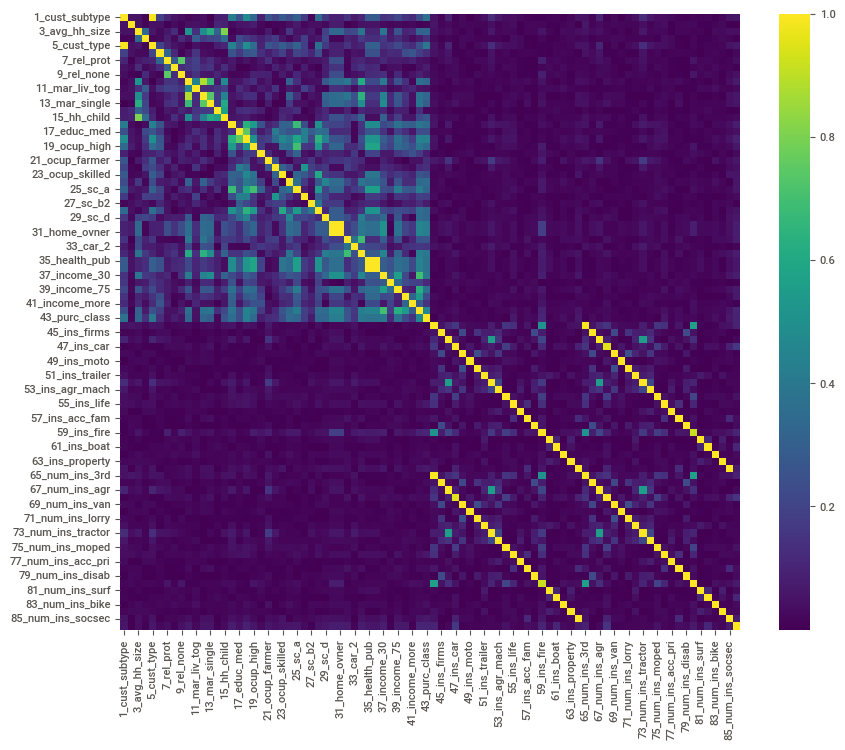

In [34]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr.abs(), cmap ='viridis' )
plt.show()

La correlación nos muestra que la mayoría de las variables sociodemográficas (1-43) tienen muy poco efecto sobre la compra de productos. Dudamos que pueda tener la misma realción sobre nuestra variable objetivo.

A parte de la diagonal amarilla, observamos que hay otras dos. Nos enseñan que variables tipo 'contrubition..' y 'number of..' coinciden en niveles muy altos. 

In [35]:
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) 
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

In [36]:
new_corr[new_corr.correlation > 0.6]

level_0          level_1  correlation
6939      81_num_ins_surf      60_ins_surf     1.000000
6069     71_num_ins_lorry     50_ins_lorry     1.000000
6330    74_num_ins_agrmac  53_ins_agr_mach     0.999999
6765     79_num_ins_disab     58_ins_disab     0.999998
6591   77_num_ins_acc_pri   56_ins_acc_pri     0.999996
6678   78_num_ins_acc_fam   57_ins_acc_fam     0.999995
7026      82_num_ins_boat      61_ins_boat     0.999995
5895       69_num_ins_van       48_ins_van     0.999994
7200  84_num_ins_property  63_ins_property     0.999992
6156   72_num_ins_trailer   51_ins_trailer     0.999989
7287    85_num_ins_socsec    64_ins_socsec     0.999970
5634     66_num_ins_firms     45_ins_firms     0.999970
6243   73_num_ins_tractor  52_ins_tractors     0.999956
5721       67_num_ins_agr       46_ins_agr     0.999944
7113      83_num_ins_bike      62_ins_bike     0.999939
5982      70_num_ins_moto      49_ins_moto     0.999814
2609        31_home_ovner     30_home_rent     0.999549
6417     75_num_ins_moped     54_ins_moped     0.999482
6504      76_num_ins_life      55_ins_life     0.999237
3044       36_health_priv    35_health_pub     0.999203
5547       65_num_ins_3rd  44_ins_amnt_3rd     0.989286
344           5_cust_type   1_cust_subtype     0.987949
5808       68_num_ins_car       47_ins_car     0.949831
6852      80_num_ins_fire      59_ins_fire     0.915881
955          12_mar_other    10_mar_maried     0.883178
1206          15_hh_child    3_avg_hh_size     0.807787
1478          18_educ_low      17_educ_med     0.750358
694            9_rel_none       7_rel_prot     0.745142
1043        13_mar_single     12_mar_other     0.736695
2082              25_sc_a     19_ocup_high     0.698684
3562        42_income_avg     37_income_30     0.695377
2869             34_car_0         32_car_1     0.691084
2079              25_sc_a     16_educ_high     0.679367
1041        13_mar_single    10_mar_maried     0.672435
2339              28_sc_c      18_educ_low     0.644443
2849             34_car_0     12_mar_other     0.644399
1477          18_educ_low     16_educ_high     0.636033
3564        42_income_avg     39_income_75     0.630481
1034        13_mar_single    3_avg_hh_size     0.626314
2847             34_car_0    10_mar_maried     0.615513
2344              28_sc_c  23_ocup_skilled     0.604976
1216          15_hh_child    13_mar_single     0.602847

Como vemos, las variables 'number...' y 'Contribution...'  tienen una correlación casi de 1. Por ello, para la prediccion, seria recomendable quitar uno de ellos. Las variables 'Number...' tienen un poco mas variación, por eso quitamos las variables de "Contribution..."

In [37]:
#Con el siguiente código, podemos quitar variables 'contribution...'. tanto en entrenamiento y test.

###data_train.drop(['44_ins_amnt_3rd','45_ins_firms',
###                '46_ins_agr','47_ins_car','48_ins_van','49_ins_moto','50_ins_lorry',
###                '51_ins_trailer','52_ins_tractors','53_ins_agr_mach','54_ins_moped','55_ins_life',
###                '56_ins_acc_pri','57_ins_acc_fam','58_ins_disab','59_ins_fire','60_ins_surf',
###                '61_ins_boat','62_ins_bike','63_ins_property','64_ins_socsec','65_num_ins_3rd'])

Ahora, analizamos las distribuciones con los gráficos.

In [38]:
def plot_histograms(df, columns):
    # keep total number of subplot
    k = len(data_train.columns)
    # n = number of chart columns
    n = columns
    m = (k - 1) // n + 1
    
    # Create figure
    fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))

    # Iterate through columns, tracking the column name and 
    # which number we are at i. Within each iteration, plot
    for i, (name, col) in enumerate(data_train.iteritems()):
        r, c = i // n, i % n
        ax = axes[r, c]
        # the histogram
        col.hist(ax=ax)
        # kde = Kernel Density Estimate plot
        ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
        ax2.set_ylim(0)

    # Use tight_layout() as an easy way to sharpen up the layout spacing
    fig.tight_layout()

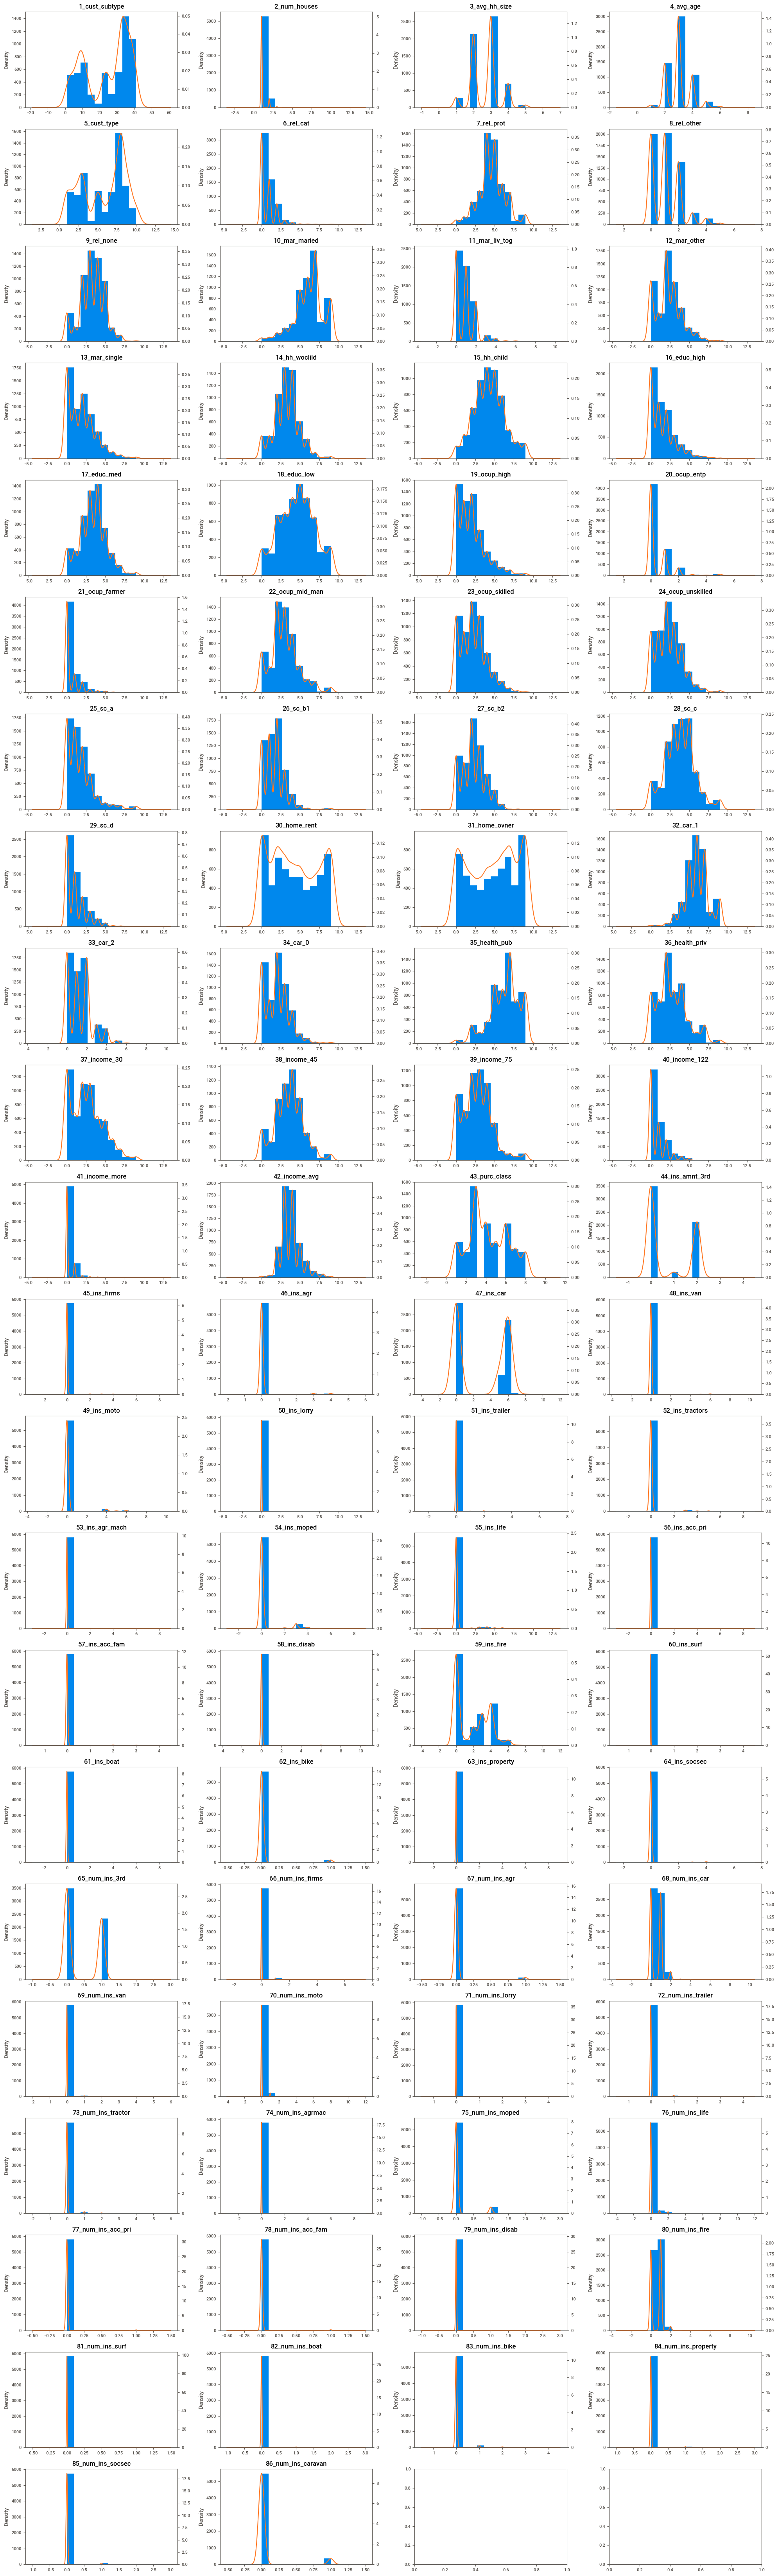

In [39]:
plot_histograms(df=data_train[['86_num_ins_caravan', '1_cust_subtype', '78_num_ins_acc_fam']], columns=4)

Las variables explicativas no tienen una distribución normal. Queremos que los clientes compren un seguro de autocaravanas, pero el porcentaje de ellos es muy pequeño. Por eso, aunque aperezcan algunas variables como outliers, en este tipo de distribuciones puede tener un significado, ya que nuestra misión es vender más seguros de autocaravana.
En el modelo de predicción, mantenemos los valores con poca densidad. En un modelo con probabilidades o logístico puede tener sentido.

Ahora, hemos filtrado nuestra correlación entre los valores 0.4 y 0.6. 

In [40]:
new_corr[(new_corr.correlation > 0.4)& (new_corr.correlation <0.6)]

level_0         level_1  correlation
2081            25_sc_a     18_educ_low     0.585141
3028     36_health_priv    19_ocup_high     0.583322
2942      35_health_pub    19_ocup_high     0.581878
1217        15_hh_child   14_hh_woclild     0.567282
6858    80_num_ins_fire  65_num_ins_3rd     0.563030
...                 ...             ...          ...
1290       16_educ_high  1_cust_subtype     0.414986
1822    22_ocup_mid_man     17_educ_med     0.412728
3550      42_income_avg         25_sc_a     0.412440
3292       39_income_75         25_sc_a     0.411522
1995  24_ocup_unskilled     18_educ_low     0.404311

[64 rows x 3 columns]

In [41]:
new_corr[new_corr.level_1 == '1_cust_subtype']

level_0         level_1  correlation
344       5_cust_type  1_cust_subtype     0.987949
1462      18_educ_low  1_cust_subtype     0.473573
1290     16_educ_high  1_cust_subtype     0.414986
3612    43_purc_class  1_cust_subtype     0.368700
2322          28_sc_c  1_cust_subtype     0.343425
...               ...             ...          ...
5246      62_ins_bike  1_cust_subtype     0.003642
1032    13_mar_single  1_cust_subtype     0.003192
4128      49_ins_moto  1_cust_subtype     0.001139
5934  70_num_ins_moto  1_cust_subtype     0.000998
0      1_cust_subtype  1_cust_subtype     0.000000

[86 rows x 3 columns]

La variable 1 incluye factores sociodemográficos y luego hay otras  42 que analizan la relación que existe entre uno y otro.  varibale 5 customer type tiene más por que customer type y customer subtype deberian ir más o menos paralelas, pero la variable 1 tiene mas categorias. En esta comparación, comparamos variable 1 contra 5. 

Es imprescindible que las otras variables sociodemográficas esten relacionados. Los valores importantes se pueden mantener sabiendo el coste o poner en un modelo de probabilidad condicional. 

Las variables de compra (44-85) no parecen correladas con la variable 1.


In [42]:
# data_train.drop['5_cust_type']

Finalmente, no hemos hecho ningun encoding. Añadir mas dummies no nos proporciona más información y al añadir más variables va a dismunir, por ejemplo, "degrees of freedoms in tests" lo que ocasionaría overfit. Por eso preferirimos quitar variables en model de predicción, como el "5_cust_type".